# Descrição
Esse notebook tem como objetivo tentar correlacionar informações sobre qualidade do ar com internações por doenças respiratórias.

Nesse notebbok será feita uma anáise dos anos de 2012 até 2019. O ano de 2011 tinha muitas informações faltantes e o de 2020 e 2021 são anos de pandemia

# 0. Libs

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# 1. Consumindo bases

In [2]:
url_sensor_boxcox = 'https://raw.githubusercontent.com/AILAB-CEFET-RJ/qualiar/refs/heads/main/data/Sensors/medicoes-sensores-boxcox.csv'

df_sensor = pd.read_csv(url_sensor_boxcox, sep=',')

In [3]:
df_sensor.head()

nome_estacao                 data data_formatada   ano  mes     chuva  \
0  ESTAÇÃO BANGU  2012-01-01 03:30:00     2012-01-01  2012    1  0.047980   
1  ESTAÇÃO BANGU  2012-01-01 04:30:00     2012-01-01  2012    1  0.049135   
2  ESTAÇÃO BANGU  2012-01-01 05:30:00     2012-01-01  2012    1  0.000000   
3  ESTAÇÃO BANGU  2012-01-01 06:30:00     2012-01-01  2012    1  0.047980   
4  ESTAÇÃO BANGU  2012-01-01 07:30:00     2012-01-01  2012    1  0.049135   

       temp          ur        co        no       no2       nox       so2  \
0  5.391891  717.112105  0.270271  1.074047  4.188282  3.146189       NaN   
1  5.396884  704.455314  0.239790  0.908644  3.309671  2.667018  0.325032   
2  5.373860  690.634888  0.199611  0.941472  3.167409  2.604209  0.112011   
3  5.378878  687.025641  0.164955  0.741128  2.452865  2.152631  0.000000   
4  5.402866  665.954527  0.132531  0.639646  3.103125  2.487619  0.000000   

         o3      pm10  pm2_5  
0  5.661444  8.405647    NaN  
1  6.066095  7.531253    NaN  
2  5.967910  5.285855    NaN  
3  6.419405  4.699533    NaN  
4  6.117444  2.780716    NaN

In [7]:
url_sus_2012 = 'https://raw.githubusercontent.com/AILAB-CEFET-RJ/qualiar/refs/heads/main/data/datasus/dados_filtrados_2012.csv'
url_sus_2013 = 'https://raw.githubusercontent.com/AILAB-CEFET-RJ/qualiar/refs/heads/main/data/datasus/dados_filtrados_2013.csv'
url_sus_2014 = 'https://raw.githubusercontent.com/AILAB-CEFET-RJ/qualiar/refs/heads/main/data/datasus/dados_filtrados_2014.csv'
url_sus_2015 = 'https://raw.githubusercontent.com/AILAB-CEFET-RJ/qualiar/refs/heads/main/data/datasus/dados_filtrados_2015.csv'
url_sus_2016 = 'https://raw.githubusercontent.com/AILAB-CEFET-RJ/qualiar/refs/heads/main/data/datasus/dados_filtrados_2016.csv'
url_sus_2017 = 'https://raw.githubusercontent.com/AILAB-CEFET-RJ/qualiar/refs/heads/main/data/datasus/dados_filtrados_2017.csv'
url_sus_2018 = 'https://raw.githubusercontent.com/AILAB-CEFET-RJ/qualiar/refs/heads/main/data/datasus/dados_filtrados_2018.csv'
url_sus_2019 = 'https://raw.githubusercontent.com/AILAB-CEFET-RJ/qualiar/refs/heads/main/data/datasus/dados_filtrados_2019.csv'

df_sus_2012 = pd.read_csv(url_sus_2012, sep=',')
df_sus_2013 = pd.read_csv(url_sus_2013, sep=',')
df_sus_2014 = pd.read_csv(url_sus_2014, sep=',')
df_sus_2015 = pd.read_csv(url_sus_2015, sep=',')
df_sus_2016 = pd.read_csv(url_sus_2016, sep=',')
df_sus_2017 = pd.read_csv(url_sus_2017, sep=',')
df_sus_2018 = pd.read_csv(url_sus_2018, sep=',')
df_sus_2019 = pd.read_csv(url_sus_2019, sep=',')

<ipython-input-7-0a65b90bcde6>:10: DtypeWarning: Columns (87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sus_2012 = pd.read_csv(url_sus_2012, sep=',')
<ipython-input-7-0a65b90bcde6>:13: DtypeWarning: Columns (87,88,95,96,97,98,99,100,101) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sus_2015 = pd.read_csv(url_sus_2015, sep=',')
<ipython-input-7-0a65b90bcde6>:15: DtypeWarning: Columns (101) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sus_2017 = pd.read_csv(url_sus_2017, sep=',')
<ipython-input-7-0a65b90bcde6>:16: DtypeWarning: Columns (101) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sus_2018 = pd.read_csv(url_sus_2018, sep=',')
<ipython-input-7-0a65b90bcde6>:17: DtypeWarning: Columns (101) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sus_2019 = pd.read_csv(url_sus_2019, sep=',')


In [24]:
df_sus = pd.concat([df_sus_2012, df_sus_2013, df_sus_2014, df_sus_2015, df_sus_2016, df_sus_2017, df_sus_2018, df_sus_2019])

df_sus.reset_index(drop=True, inplace=True)

In [29]:
df_sus.head()

UF_ZI  ANO_CMPT  MES_CMPT  MUNIC_RES      NASC  SEXO  DT_INTER  DT_SAIDA  \
0  330000      2012         1     330015  19500910     3  20111230  20120102   
1  330000      2012         1     330020  19750804     1  20120113  20120122   
2  330000      2012         1     330020  19310409     3  20120103  20120113   
3  330000      2012         1     330060  19490215     1  20120102  20120105   
4  330000      2012         1     330470  19781228     3  20120113  20120117   

  DIAG_PRINC DIAG_SECUN  IDADE  DIAS_PERM  MORTE  
0       J960        NaN     61          3      0  
1       J159        NaN     36          9      0  
2       J189        NaN     80         10      0  
3       J189        NaN     62          3      0  
4       J960        NaN     33          4      0

# 2. Pré-processamento dos Sensores

In [71]:
cols_to_scale = ['pm2_5', 'pm10', 'nox']

# Inicializa o StandardScaler
scaler = StandardScaler()

# Aplica o scaler e cria novas colunas
df_sensor[['pm2_5_scaled', 'pm10_scaled', 'nox_scaled']] = scaler.fit_transform(df_sensor[cols_to_scale])

In [72]:
#@title Agregando por ano e mês e gerando a média de todos os valores

# Estamos fazer isso para podemos gerar uma média mensal dos valores dos poluentes de cada ano
df_sensor_aggregated = df_sensor.groupby(by=['ano', 'mes'])[['pm2_5', 'pm2_5_scaled', 'pm10', 'pm10_scaled', 'co', 'no', 'no2', 'nox',  'nox_scaled', 'so2', 'o3', 'chuva', 'temp', 'ur']].mean().reset_index()

In [73]:
#@title Analisando o resultado da agregação
df_sensor_aggregated

ano  mes     pm2_5  pm2_5_scaled      pm10  pm10_scaled        co  \
0   2012    1  2.934037     -0.525358  5.449502    -0.232430  0.209479   
1   2012    2  2.804636     -0.616755  6.101456     0.187090  0.200126   
2   2012    3  3.117087     -0.396068  5.727507    -0.053539  0.203010   
3   2012    4  3.157318     -0.367652  5.754887    -0.035920  0.229975   
4   2012    5  3.211137     -0.329640  5.789467    -0.013669  0.235028   
..   ...  ...       ...           ...       ...          ...       ...   
91  2019    8       NaN           NaN  5.753120    -0.037058  0.173731   
92  2019    9       NaN           NaN  6.051155     0.154722  0.206841   
93  2019   10  2.946791     -0.516349  5.898383     0.056417  0.195438   
94  2019   11  2.972755     -0.498010  5.498354    -0.200994  0.193940   
95  2019   12  3.441170     -0.167166  5.401233    -0.263490  0.226419   

          no       no2       nox  nox_scaled       so2        o3     chuva  \
0   1.882698  5.752355  4.098962    0.020630  1.114609  4.626525  0.006559   
1   1.711945  5.661756  4.000642   -0.091715  1.310487  5.368871  0.001062   
2   1.865651  5.988720  4.170015    0.101819  1.288866  5.230506  0.003689   
3   2.013004  6.042356  4.269061    0.214994  1.083619  4.681028  0.003090   
4   2.350207  6.356387  4.572516    0.561738  1.216006  3.935988  0.004134   
..       ...       ...       ...         ...       ...       ...       ...   
91  2.115907  5.984975  4.274404    0.221100  1.299325  5.546879  0.004556   
92  1.887471  5.812367  4.108298    0.031298  1.174059  5.936316  0.005936   
93  1.820482  5.569907  3.974663   -0.121400  1.247859  6.624690  0.002261   
94  1.752403  4.719943  3.606703   -0.541852  1.284253  6.313894  0.004179   
95  1.807999  5.041469  3.760049   -0.366630  1.298692  5.799936  0.003385   

        temp          ur  
0   5.623915  512.756069  
1   5.869294  407.400762  
2   5.697200  486.558869  
3   5.574842  531.251087  
4   5.270589  530.131615  
..       ...         ...  
91  5.142721  506.232162  
92  5.316081  549.635746  
93  5.566730  461.634463  
94  5.491684  507.933700  
95  5.650276  471.964478  

[96 rows x 16 columns]

# 3. Pré-processamento dos SUS

In [74]:
#@title Selecionando as colunas mais relevantes
interest_columns = ['UF_ZI', 'ANO_CMPT', 'MES_CMPT', 'MUNIC_RES', 'NASC', 'SEXO', 'DT_INTER', 'DT_SAIDA', 'DIAG_PRINC', 'DIAG_SECUN', 'IDADE', 'DIAS_PERM', 'MORTE']

df_sus = df_sus[interest_columns]

In [75]:
#@title Filtrando pelos municípios de interesse (Niterói, São Gonçalo, Magé, Itaboraí, Maricá, Queimados, Duque de Caxias, Mesquita, Nilópolis, Belford Roxo, São João de Meriti, Nova Iguaçu, Rio de Janeiro)
municipios_interesse = [330455, 330414, 330270, 330190, 330250, 330510, 330320, 330285, 330045, 330350, 330170, 330490, 330330]

municipios_interesse_sugestao = [330455, 330510, 330320, 330285, 330045, 330350, 330170]

municipios_rio_de_janeiro = [330455]

# UF_ZI: Unidade Federativa (UF) de ZI, que é a UF vinculada a um hospital para fins de pagamento da Autorização de Internação Hospitalar
df_sus = df_sus[df_sus['UF_ZI'].isin(municipios_interesse_sugestao)]

In [76]:
#@title Gerando dataframe que vai conter a quantidade de internações por mês de 2016
df_sus_aggregated = df_sus.groupby(['ANO_CMPT', 'MES_CMPT']).agg(
    num_internacoes=('DT_INTER', 'count')
).reset_index()

In [77]:
#@title Renomeando as colunas 'ANO_CMPT', 'MES_CMPT' para ano e mês e criando a colunas mes_anos
df_sus_aggregated = df_sus_aggregated.rename(columns={'ANO_CMPT': 'ano', 'MES_CMPT': 'mes'})
df_sus_aggregated['mes_ano'] = df_sus_aggregated['ano'].astype(str) + '-' + df_sus_aggregated['mes'].astype(str)

In [78]:
#@title Analisando resultado da agregação
df_sus_aggregated

ano  mes  num_internacoes  mes_ano
0   2012    1             1285   2012-1
1   2012    2             1192   2012-2
2   2012    3             1600   2012-3
3   2012    4             1651   2012-4
4   2012    5             2093   2012-5
..   ...  ...              ...      ...
91  2019    8             1613   2019-8
92  2019    9             1407   2019-9
93  2019   10             1387  2019-10
94  2019   11             1726  2019-11
95  2019   12             1603  2019-12

[96 rows x 4 columns]

# 4. Unificando o dataframe de sensor com o do SUS

In [79]:
#@title Unindo os DataFrames agregados
df_merged = pd.merge(df_sensor_aggregated, df_sus_aggregated, on=['ano', 'mes'], how='inner')

In [80]:
#@title Analisando resultado da unificação
df_merged.head()

ano  mes     pm2_5  pm2_5_scaled      pm10  pm10_scaled        co  \
0  2012    1  2.934037     -0.525358  5.449502    -0.232430  0.209479   
1  2012    2  2.804636     -0.616755  6.101456     0.187090  0.200126   
2  2012    3  3.117087     -0.396068  5.727507    -0.053539  0.203010   
3  2012    4  3.157318     -0.367652  5.754887    -0.035920  0.229975   
4  2012    5  3.211137     -0.329640  5.789467    -0.013669  0.235028   

         no       no2       nox  nox_scaled       so2        o3     chuva  \
0  1.882698  5.752355  4.098962    0.020630  1.114609  4.626525  0.006559   
1  1.711945  5.661756  4.000642   -0.091715  1.310487  5.368871  0.001062   
2  1.865651  5.988720  4.170015    0.101819  1.288866  5.230506  0.003689   
3  2.013004  6.042356  4.269061    0.214994  1.083619  4.681028  0.003090   
4  2.350207  6.356387  4.572516    0.561738  1.216006  3.935988  0.004134   

       temp          ur  num_internacoes mes_ano  
0  5.623915  512.756069             1285  2012-1  
1  5.869294  407.400762             1192  2012-2  
2  5.697200  486.558869             1600  2012-3  
3  5.574842  531.251087             1651  2012-4  
4  5.270589  530.131615             2093  2012-5

# 5. Gerando gráficos

## 5.1 Matrix de correlação

Podemos concluir nessa nossa análise inicial que PM2.5, PM10, CO e NO2 possuem certa relação com a quantidade de internações. Sendo PM2.5 a que possui maior correlação

In [83]:
#@title Gerando correlação entre as colunas

correlation_matrix = df_merged[['pm2_5', 'pm10', 'co', 'o3', 'no', 'no2', 'nox', 'so2', 'chuva', 'temp', 'ur', 'num_internacoes']].corr()

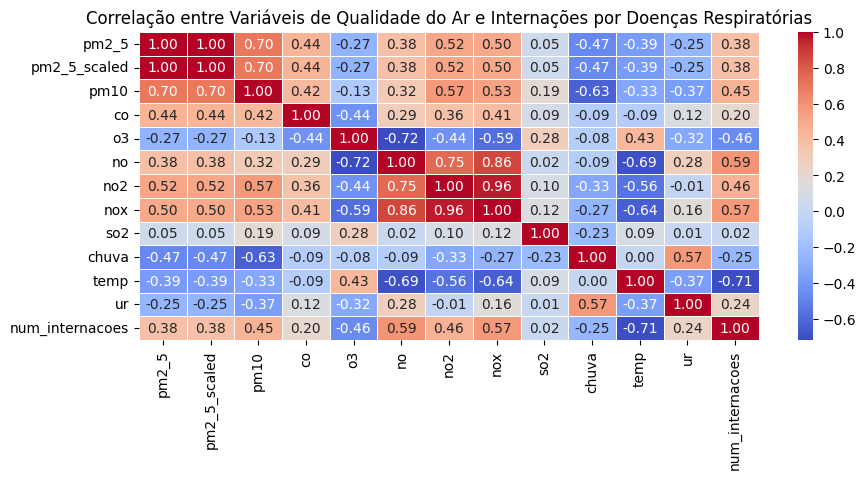

In [84]:
#@title Plotar o heatmap da matriz de correlação
plt.figure(figsize=(10, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlação entre Variáveis de Qualidade do Ar e Internações por Doenças Respiratórias')
plt.show()

## 5.2 PM2.5

In [40]:
poluente = 'pm2_5'

ValueError: x and y must be the same size

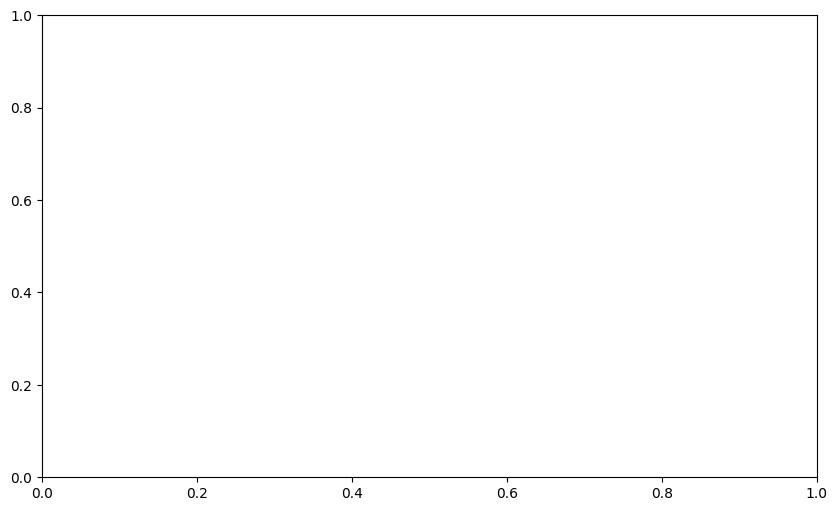

In [42]:
#@title ScatterPlot

# Ajustando a figura
plt.figure(figsize=(10, 6))

# Plotando o gráfico de dispersão
plt.scatter(df_merged[poluente], df_merged['num_internacoes'], c='blue', alpha=0.5, s=50)

# Ajustando a linha de tendência (regressão linear)
regressor = LinearRegression()
X = df_merged[poluente].values.reshape(-1, 1)  # Regressão no eixo x
y = df_merged['num_internacoes'].values
regressor.fit(X, y)
y_pred = regressor.predict(X)

# Plotando a linha de tendência
plt.plot(df_merged[poluente], y_pred, color='red', linewidth=2, label='Linha de Tendência')

# Adicionando rótulos e título
plt.xlabel('Concentração de PM2.5 (µg/m³)', fontsize=12, fontweight='bold')
plt.ylabel('Número de Internações por Doenças Respiratórias', fontsize=12, fontweight='bold')
plt.title('Correlação entre PM2.5 e Internações por Doenças Respiratórias', fontsize=14, fontweight='bold')

# Melhorando o grid
plt.grid(True, linestyle='--', alpha=0.6)

# Ajustando o layout para não cortar conteúdo
plt.tight_layout()

# Exibindo a legenda
plt.legend()

# Exibindo o gráfico
plt.show()

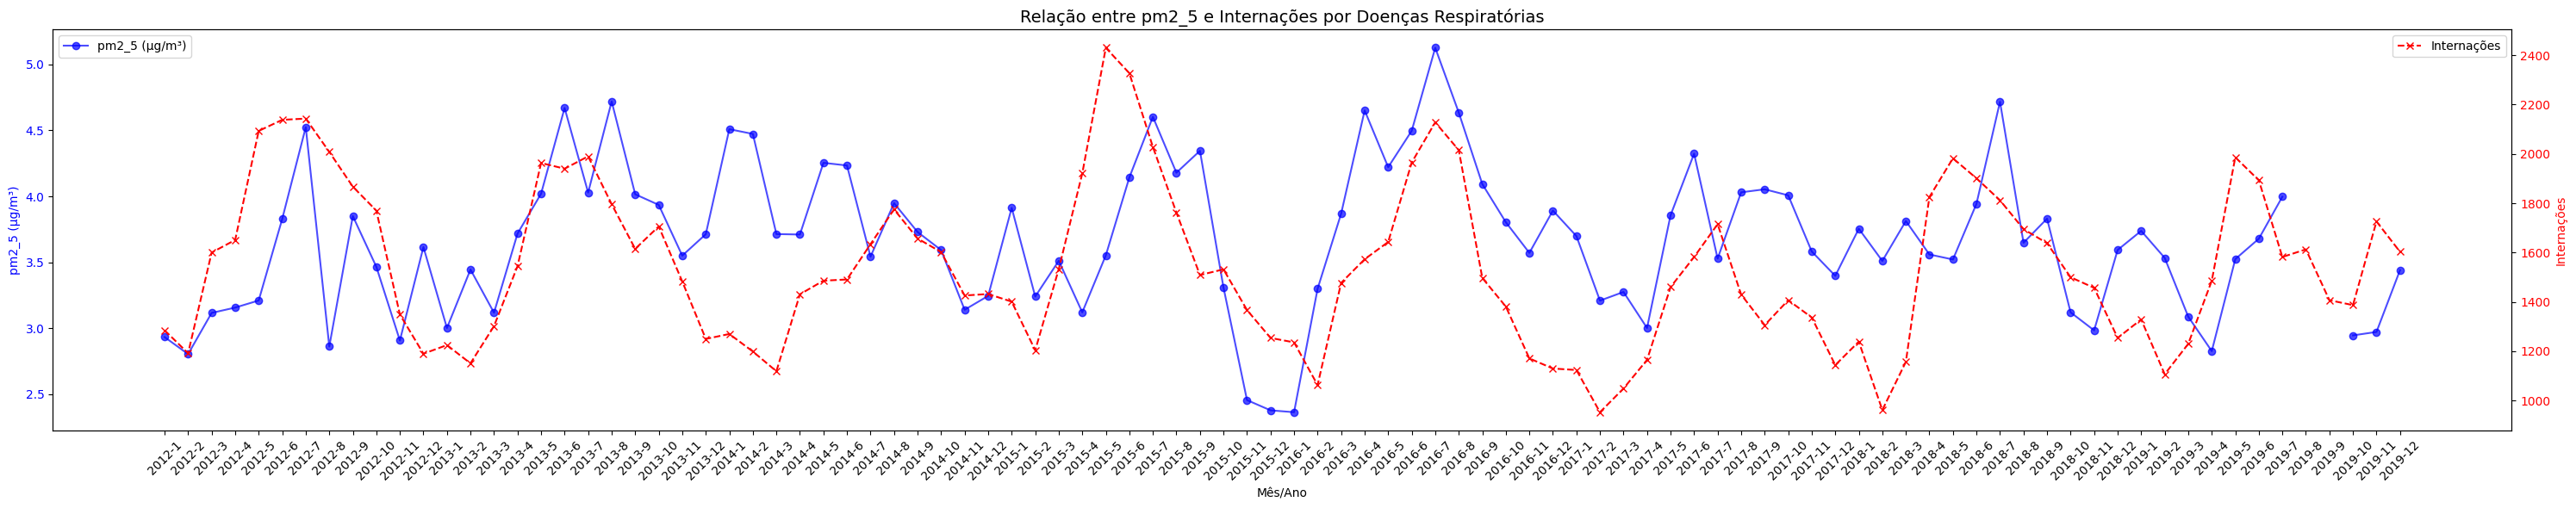

In [43]:
#@title Gerando gráfico de linha temporal para os valores de PM2.5 e numero de internados

# Gráfico 1: Relação entre Poluente e Internações
fig, ax1 = plt.subplots(figsize=(30, 6))

# Plotar o poluente no eixo Y à esquerda
ax1.plot(df_merged['mes_ano'], df_merged[poluente], label=f'{poluente} (µg/m³)', color='blue', marker='o', linestyle='-', alpha=0.7)
ax1.set_xlabel('Mês/Ano')
ax1.set_ylabel(f'{poluente} (µg/m³)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.tick_params(axis='x', rotation=45)  # Rotacionar as labels de mês/ano para melhor leitura

# Criar o eixo Y à direita para as internações
ax2 = ax1.twinx()  # Cria o eixo Y à direita
ax2.plot(df_merged['mes_ano'], df_merged['num_internacoes'], label='Internações', color='red', linestyle='--', marker='x')
ax2.set_ylabel('Internações', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Título
plt.title(f'Relação entre {poluente} e Internações por Doenças Respiratórias', fontsize=14)

# Legendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Ajuste de layout para não sobrepor os elementos
plt.tight_layout()

plt.show()

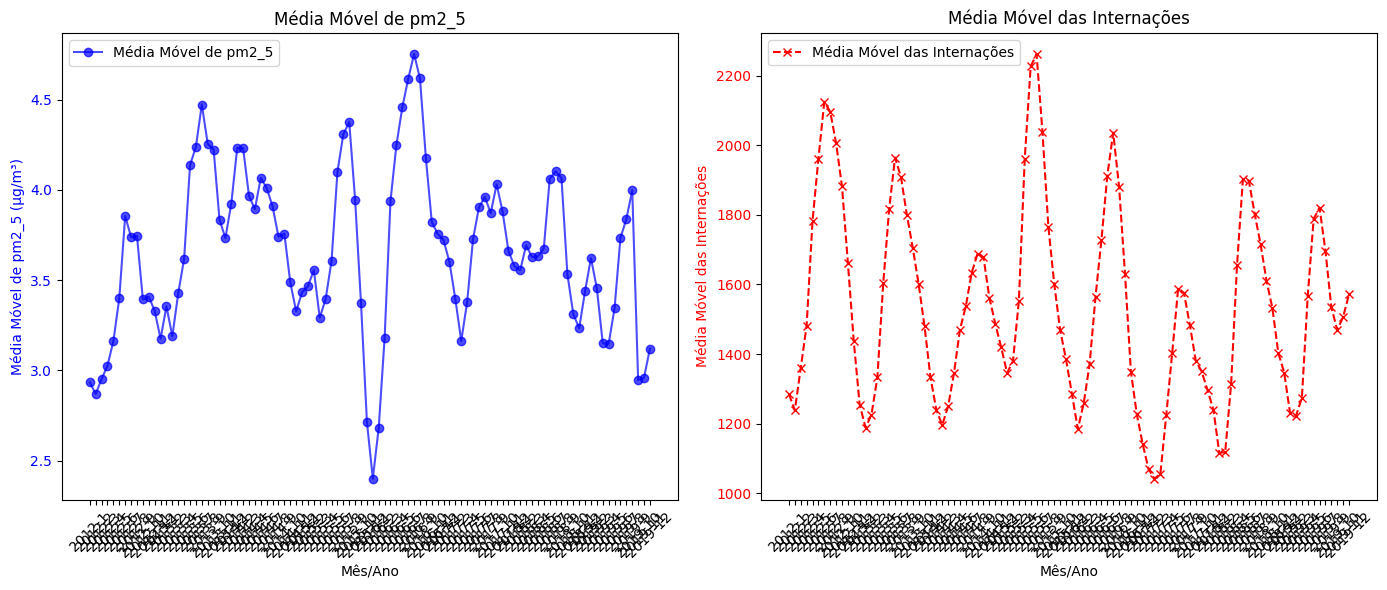

In [44]:
#@title Gráfico da média movel

# A média móvel é uma excelente ferramenta para analisar dados temporais e entender padrões de longo prazo sem ser afetado por flutuações mensais. Ao comparar as médias móveis
# do poluente e das internações, você pode identificar tendências e relações que podem ser relevantes para a análise de como a poluição impacta a saúde pública.

# Calcular a média móvel para suavizar as flutuações (opcional)
df_merged['pm2_5_moving_avg'] = df_merged[poluente].rolling(window=3, min_periods=1).mean()  # Média móvel de 3 meses
df_merged['internacoes_moving_avg'] = df_merged['num_internacoes'].rolling(window=3, min_periods=1).mean()  # Média móvel de 3 meses

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 1: Média Móvel de PM2.5
ax1.plot(df_merged['mes_ano'], df_merged['pm2_5_moving_avg'], label=f'Média Móvel de {poluente}', color='blue', linestyle='-', marker='o', alpha=0.7)
ax1.set_xlabel('Mês/Ano')
ax1.set_ylabel(f'Média Móvel de {poluente} (µg/m³)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.tick_params(axis='x', rotation=45)
ax1.set_title(f'Média Móvel de {poluente}', fontsize=12)
ax1.legend(loc='upper left')

# Gráfico 2: Média Móvel das Internações
ax2.plot(df_merged['mes_ano'], df_merged['internacoes_moving_avg'], label='Média Móvel das Internações', color='red', linestyle='--', marker='x')
ax2.set_xlabel('Mês/Ano')
ax2.set_ylabel('Média Móvel das Internações', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.tick_params(axis='x', rotation=45)
ax2.set_title('Média Móvel das Internações', fontsize=12)
ax2.legend(loc='upper left')

# Ajuste de layout para não sobrepor os elementos
plt.tight_layout()

# Mostrar os gráficos
plt.show()

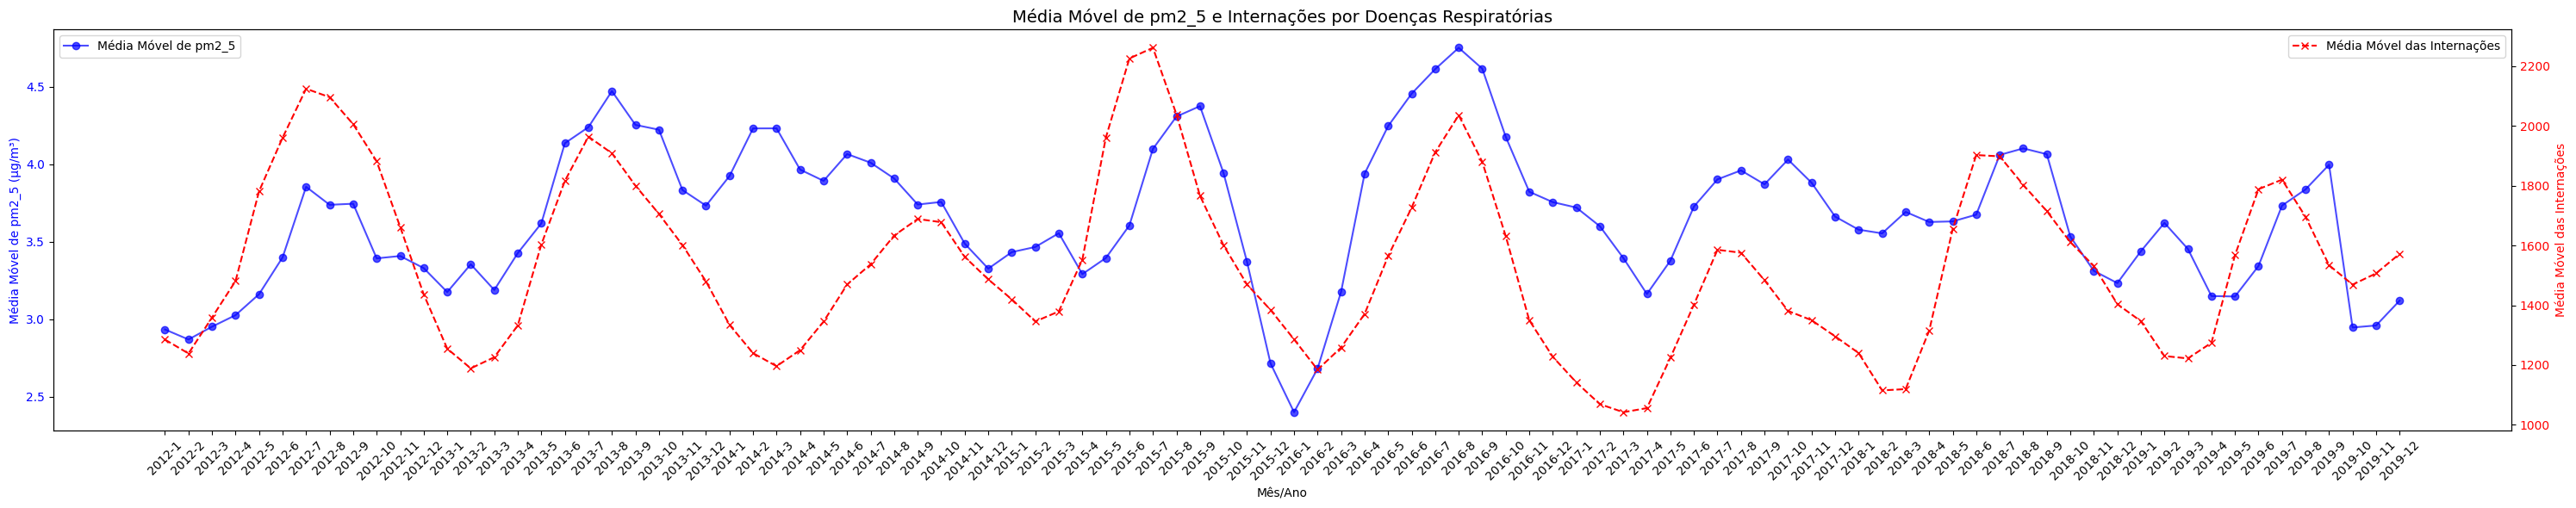

In [45]:
#@title Media movel sobreposto

# Calcular a média móvel para suavizar as flutuações (opcional)
df_merged['pm2_5_moving_avg'] = df_merged[poluente].rolling(window=3, min_periods=1).mean()  # Média móvel de 3 meses
df_merged['internacoes_moving_avg'] = df_merged['num_internacoes'].rolling(window=3, min_periods=1).mean()  # Média móvel de 3 meses

# Gráfico 2: Média Móvel do Poluente e das Internações
fig, ax1 = plt.subplots(figsize=(30, 6))

# Plotar a média móvel do poluente no eixo Y à esquerda
ax1.plot(df_merged['mes_ano'], df_merged['pm2_5_moving_avg'], label=f'Média Móvel de {poluente}', color='blue', linestyle='-', marker='o', alpha=0.7)
ax1.set_xlabel('Mês/Ano')
ax1.set_ylabel(f'Média Móvel de {poluente} (µg/m³)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.tick_params(axis='x', rotation=45)

# Criar o eixo Y à direita para a média móvel das internações
ax2 = ax1.twinx()  # Cria o eixo Y à direita
ax2.plot(df_merged['mes_ano'], df_merged['internacoes_moving_avg'], label='Média Móvel das Internações', color='red', linestyle='--', marker='x')
ax2.set_ylabel('Média Móvel das Internações', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title(f'Média Móvel de {poluente} e Internações por Doenças Respiratórias', fontsize=14)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()

plt.show()

## 5.2 PM10

In [46]:
poluente = 'pm10'

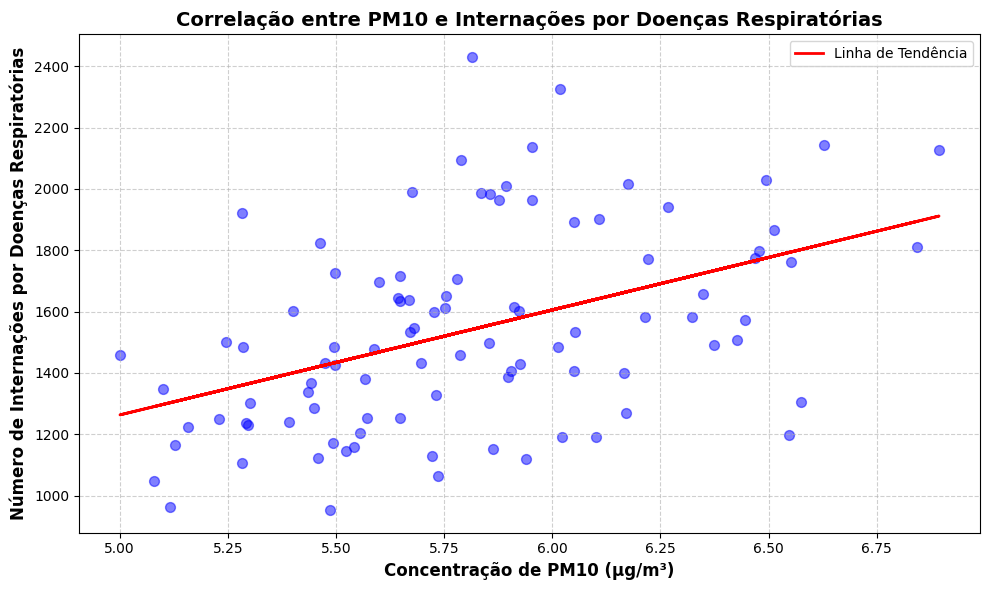

In [47]:
#@title ScatterPlot

# Ajustando a figura
plt.figure(figsize=(10, 6))

# Plotando o gráfico de dispersão
plt.scatter(df_merged[poluente], df_merged['num_internacoes'], c='blue', alpha=0.5, s=50)

# Ajustando a linha de tendência (regressão linear)
regressor = LinearRegression()
X = df_merged[poluente].values.reshape(-1, 1)  # Regressão no eixo x
y = df_merged['num_internacoes'].values
regressor.fit(X, y)
y_pred = regressor.predict(X)

# Plotando a linha de tendência
plt.plot(df_merged[poluente], y_pred, color='red', linewidth=2, label='Linha de Tendência')

# Adicionando rótulos e título
plt.xlabel('Concentração de PM10 (µg/m³)', fontsize=12, fontweight='bold')
plt.ylabel('Número de Internações por Doenças Respiratórias', fontsize=12, fontweight='bold')
plt.title('Correlação entre PM10 e Internações por Doenças Respiratórias', fontsize=14, fontweight='bold')

# Melhorando o grid
plt.grid(True, linestyle='--', alpha=0.6)

# Ajustando o layout para não cortar conteúdo
plt.tight_layout()

# Exibindo a legenda
plt.legend()

# Exibindo o gráfico
plt.show()

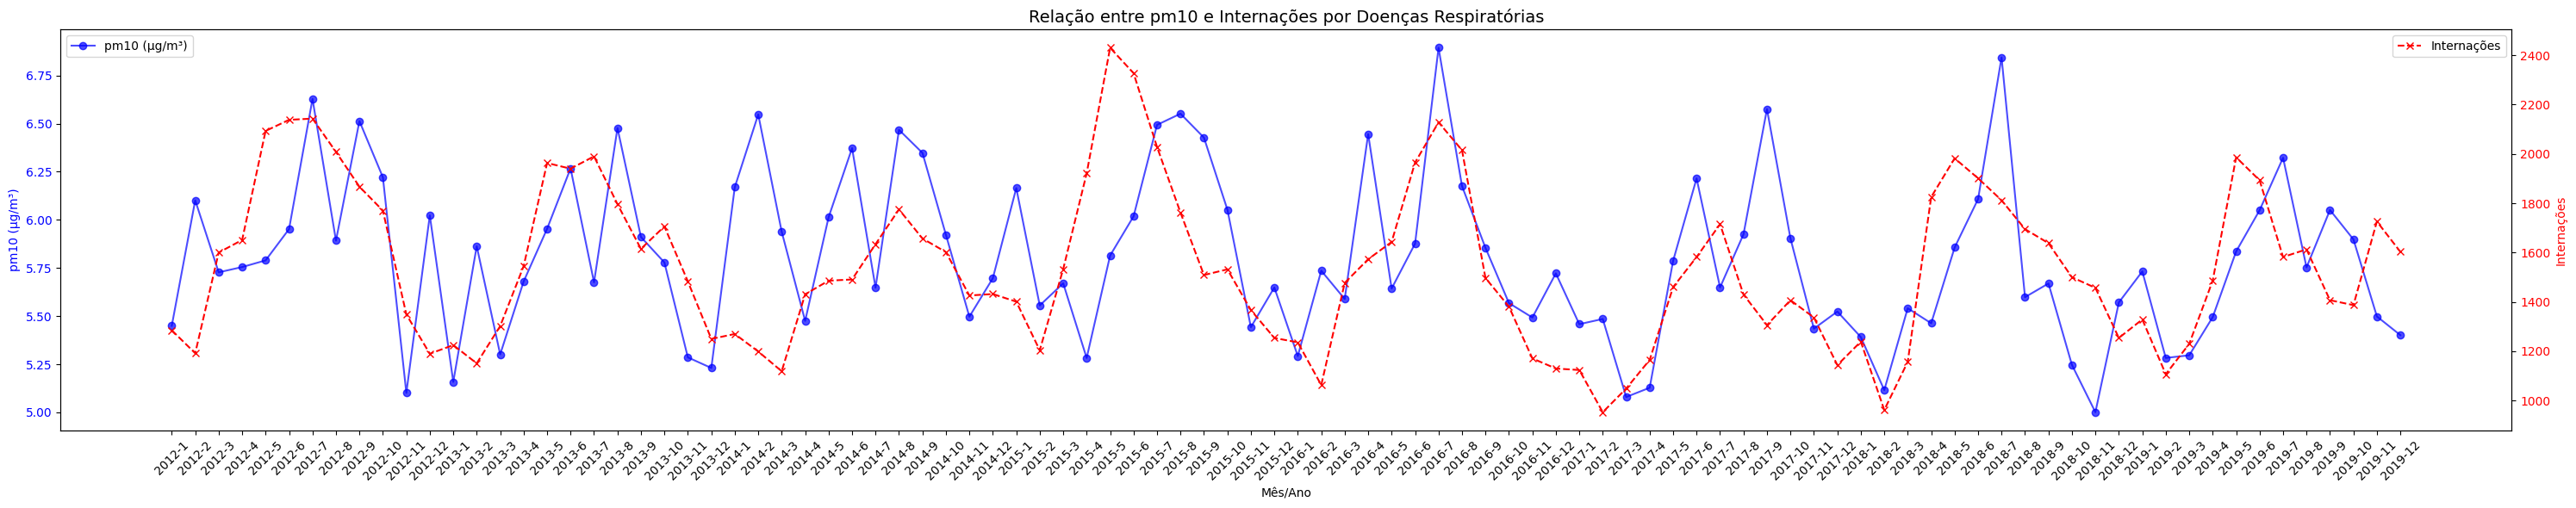

In [48]:
#@title Gerando gráfico de linha temporal para os valores de PM10 e numero de internados

# Gráfico 1: Relação entre Poluente e Internações
fig, ax1 = plt.subplots(figsize=(30, 6))

# Plotar o poluente no eixo Y à esquerda
ax1.plot(df_merged['mes_ano'], df_merged[poluente], label=f'{poluente} (µg/m³)', color='blue', marker='o', linestyle='-', alpha=0.7)
ax1.set_xlabel('Mês/Ano')
ax1.set_ylabel(f'{poluente} (µg/m³)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.tick_params(axis='x', rotation=45)  # Rotacionar as labels de mês/ano para melhor leitura

# Criar o eixo Y à direita para as internações
ax2 = ax1.twinx()  # Cria o eixo Y à direita
ax2.plot(df_merged['mes_ano'], df_merged['num_internacoes'], label='Internações', color='red', linestyle='--', marker='x')
ax2.set_ylabel('Internações', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adicionar título
plt.title(f'Relação entre {poluente} e Internações por Doenças Respiratórias', fontsize=14)

# Adicionar as legendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Ajuste de layout para não sobrepor os elementos
plt.tight_layout()

# Mostrar o gráfico de linha original
plt.show()

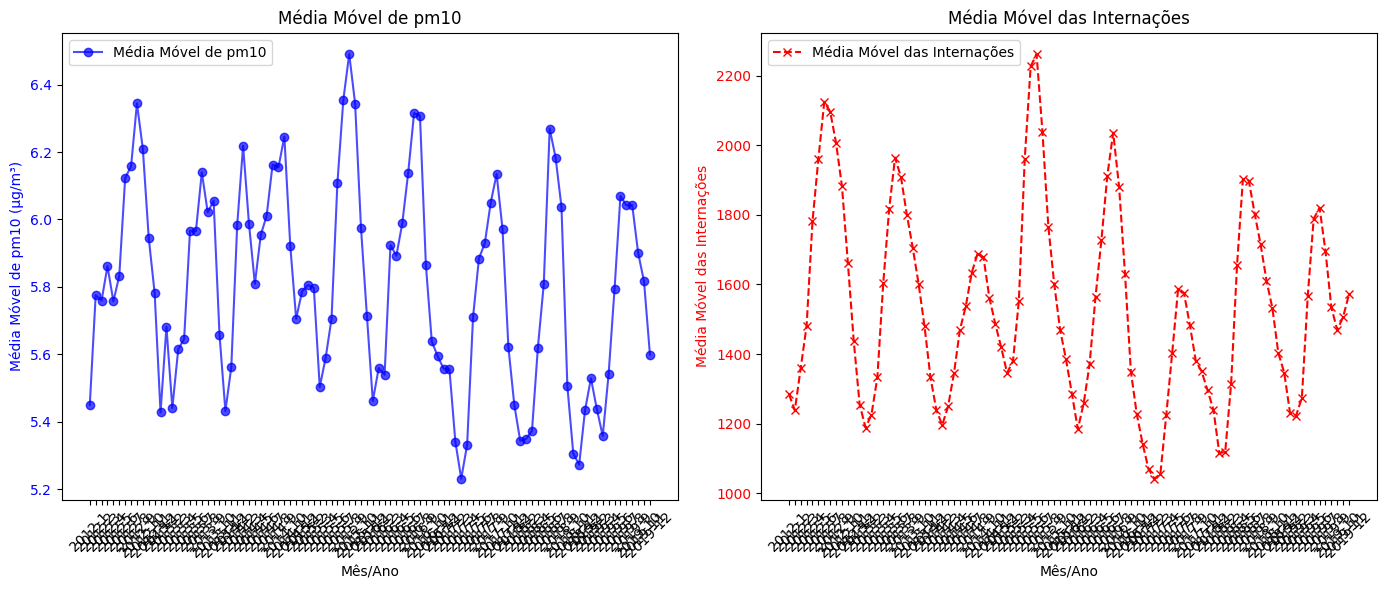

In [49]:
#@title Gráfico da média movel

# A média móvel é uma excelente ferramenta para analisar dados temporais e entender padrões de longo prazo sem ser afetado por flutuações mensais. Ao comparar as médias móveis
# do poluente e das internações, você pode identificar tendências e relações que podem ser relevantes para a análise de como a poluição impacta a saúde pública.

# Calcular a média móvel para suavizar as flutuações (opcional)
df_merged['pm2_5_moving_avg'] = df_merged[poluente].rolling(window=3, min_periods=1).mean()  # Média móvel de 3 meses
df_merged['internacoes_moving_avg'] = df_merged['num_internacoes'].rolling(window=3, min_periods=1).mean()  # Média móvel de 3 meses

# Criar uma figura com dois subgráficos lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))  # 1 linha, 2 colunas

# Gráfico 1: Média Móvel de PM2.5
ax1.plot(df_merged['mes_ano'], df_merged['pm2_5_moving_avg'], label=f'Média Móvel de {poluente}', color='blue', linestyle='-', marker='o', alpha=0.7)
ax1.set_xlabel('Mês/Ano')
ax1.set_ylabel(f'Média Móvel de {poluente} (µg/m³)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.tick_params(axis='x', rotation=45)
ax1.set_title(f'Média Móvel de {poluente}', fontsize=12)
ax1.legend(loc='upper left')

# Gráfico 2: Média Móvel das Internações
ax2.plot(df_merged['mes_ano'], df_merged['internacoes_moving_avg'], label='Média Móvel das Internações', color='red', linestyle='--', marker='x')
ax2.set_xlabel('Mês/Ano')
ax2.set_ylabel('Média Móvel das Internações', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.tick_params(axis='x', rotation=45)
ax2.set_title('Média Móvel das Internações', fontsize=12)
ax2.legend(loc='upper left')

# Ajuste de layout para não sobrepor os elementos
plt.tight_layout()

# Mostrar os gráficos
plt.show()

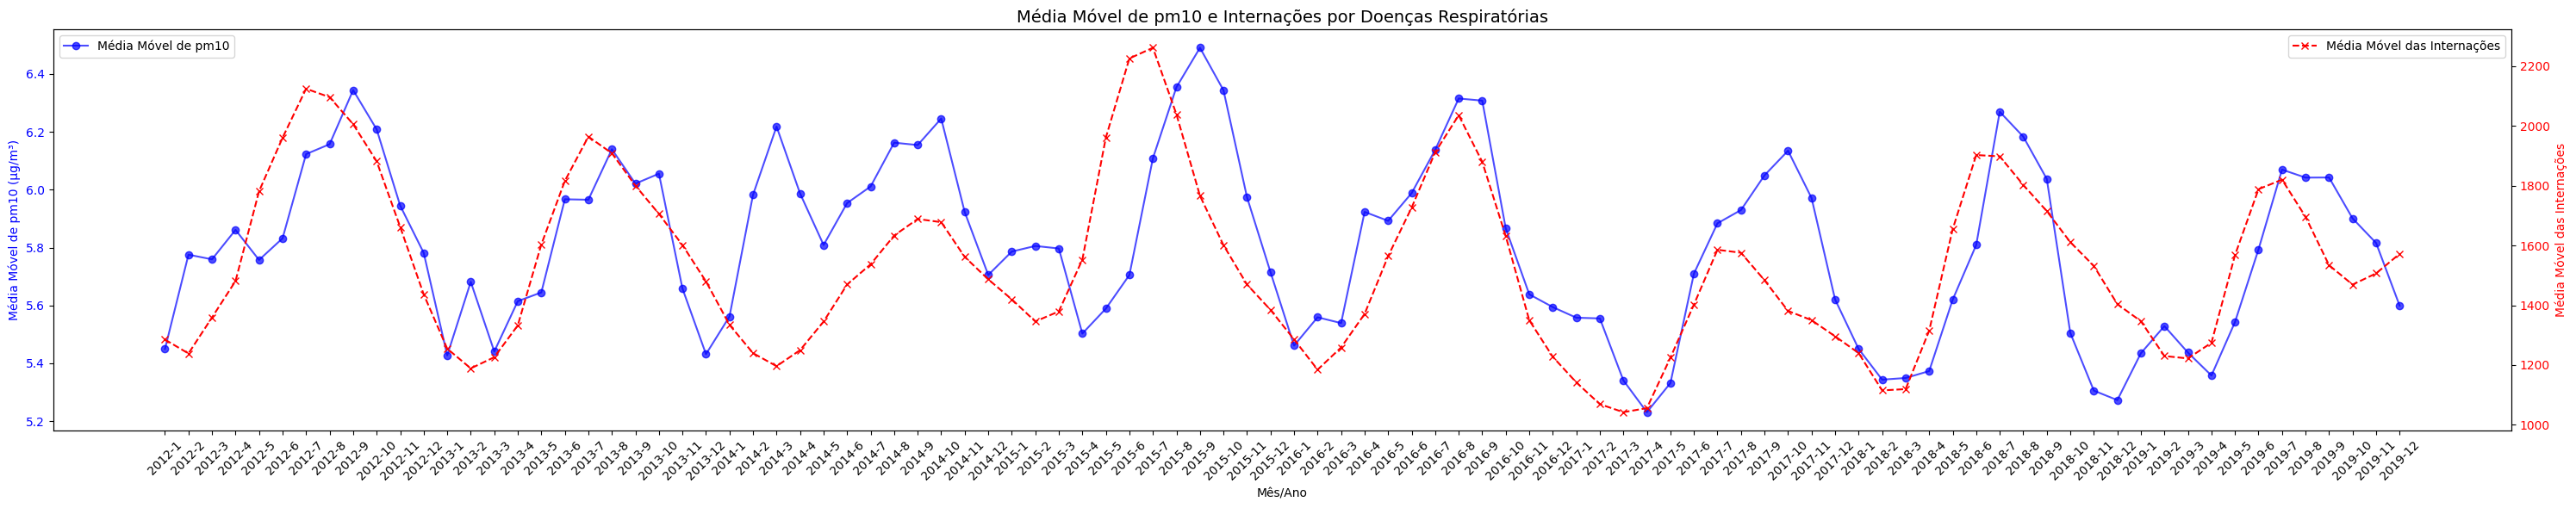

In [50]:
#@title Media movel sobreposto

# Calcular a média móvel para suavizar as flutuações (opcional)
df_merged['pm2_5_moving_avg'] = df_merged[poluente].rolling(window=3, min_periods=1).mean()  # Média móvel de 3 meses
df_merged['internacoes_moving_avg'] = df_merged['num_internacoes'].rolling(window=3, min_periods=1).mean()  # Média móvel de 3 meses

# Gráfico 2: Média Móvel do Poluente e das Internações
fig, ax1 = plt.subplots(figsize=(30, 6))

# Plotar a média móvel do poluente no eixo Y à esquerda
ax1.plot(df_merged['mes_ano'], df_merged['pm2_5_moving_avg'], label=f'Média Móvel de {poluente}', color='blue', linestyle='-', marker='o', alpha=0.7)
ax1.set_xlabel('Mês/Ano')
ax1.set_ylabel(f'Média Móvel de {poluente} (µg/m³)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.tick_params(axis='x', rotation=45)

# Criar o eixo Y à direita para a média móvel das internações
ax2 = ax1.twinx()  # Cria o eixo Y à direita
ax2.plot(df_merged['mes_ano'], df_merged['internacoes_moving_avg'], label='Média Móvel das Internações', color='red', linestyle='--', marker='x')
ax2.set_ylabel('Média Móvel das Internações', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adicionar título
plt.title(f'Média Móvel de {poluente} e Internações por Doenças Respiratórias', fontsize=14)

# Adicionar as legendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Ajuste de layout para não sobrepor os elementos
plt.tight_layout()

# Mostrar o gráfico da média móvel
plt.show()

## 5.2 CO

In [57]:
poluente = 'co'

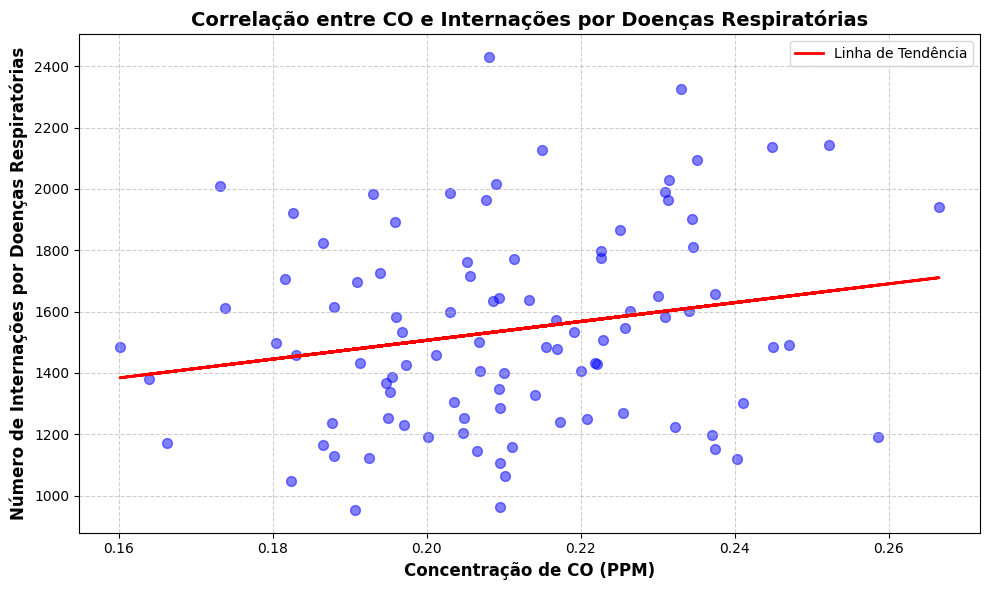

In [58]:
#@title ScatterPlot

# Ajustando a figura
plt.figure(figsize=(10, 6))

# Plotando o gráfico de dispersão
plt.scatter(df_merged[poluente], df_merged['num_internacoes'], c='blue', alpha=0.5, s=50)

# Ajustando a linha de tendência (regressão linear)
regressor = LinearRegression()
X = df_merged[poluente].values.reshape(-1, 1)  # Regressão no eixo x
y = df_merged['num_internacoes'].values
regressor.fit(X, y)
y_pred = regressor.predict(X)

# Plotando a linha de tendência
plt.plot(df_merged[poluente], y_pred, color='red', linewidth=2, label='Linha de Tendência')

# Adicionando rótulos e título
plt.xlabel('Concentração de CO (PPM)', fontsize=12, fontweight='bold')
plt.ylabel('Número de Internações por Doenças Respiratórias', fontsize=12, fontweight='bold')
plt.title('Correlação entre CO e Internações por Doenças Respiratórias', fontsize=14, fontweight='bold')

# Melhorando o grid
plt.grid(True, linestyle='--', alpha=0.6)

# Ajustando o layout para não cortar conteúdo
plt.tight_layout()

# Exibindo a legenda
plt.legend()

# Exibindo o gráfico
plt.show()

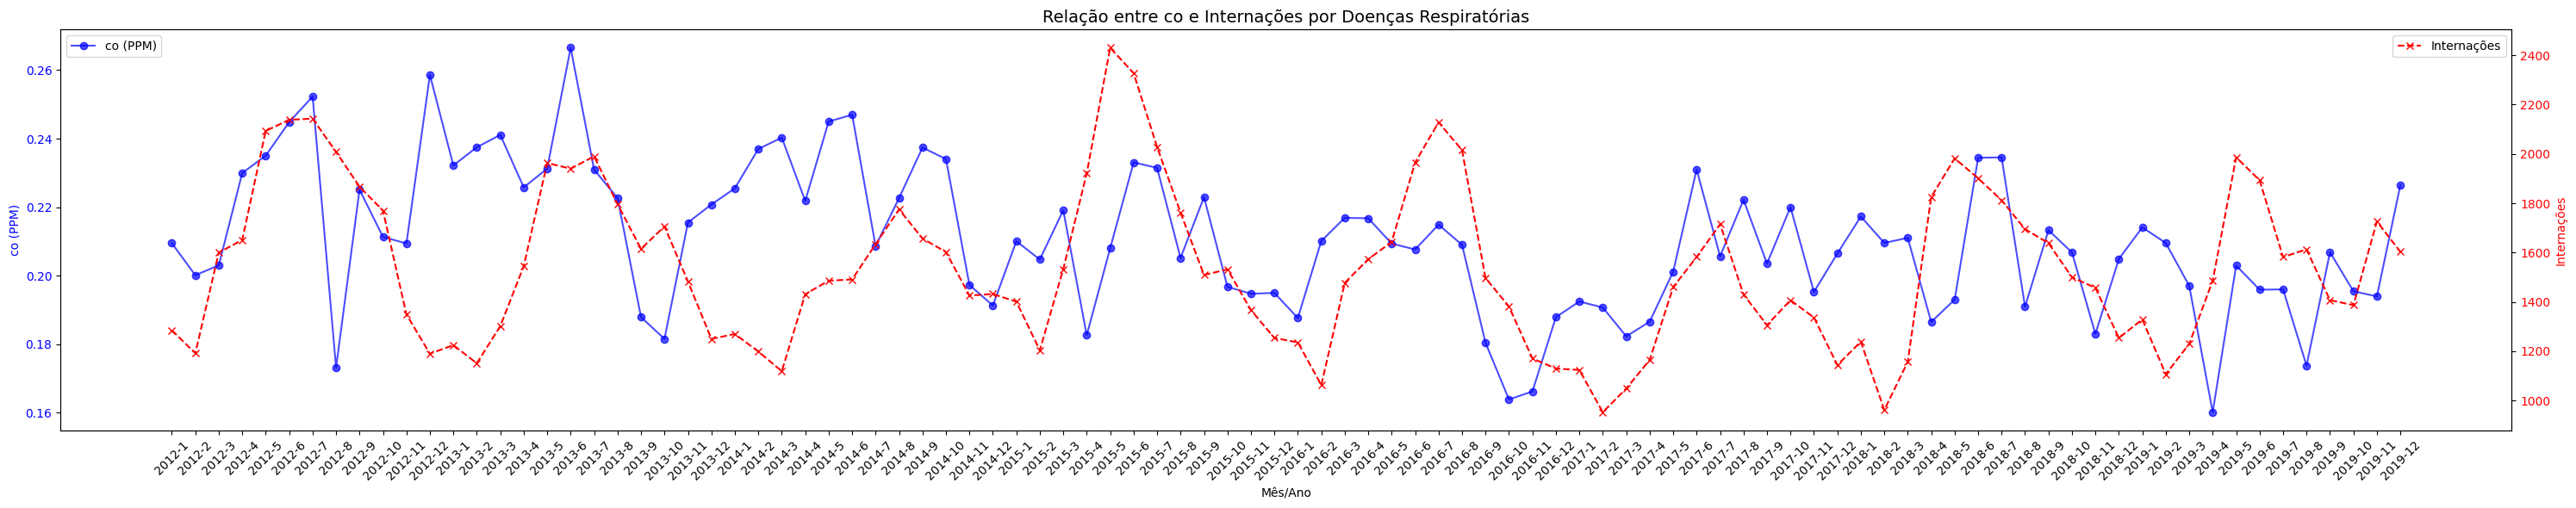

In [59]:
#@title Gerando gráfico de linha temporal para os valores de CO e numero de internados

# Gráfico 1: Relação entre Poluente e Internações
fig, ax1 = plt.subplots(figsize=(30, 6))

# Plotar o poluente no eixo Y à esquerda
ax1.plot(df_merged['mes_ano'], df_merged[poluente], label=f'{poluente} (PPM)', color='blue', marker='o', linestyle='-', alpha=0.7)
ax1.set_xlabel('Mês/Ano')
ax1.set_ylabel(f'{poluente} (PPM)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.tick_params(axis='x', rotation=45)  # Rotacionar as labels de mês/ano para melhor leitura

# Criar o eixo Y à direita para as internações
ax2 = ax1.twinx()  # Cria o eixo Y à direita
ax2.plot(df_merged['mes_ano'], df_merged['num_internacoes'], label='Internações', color='red', linestyle='--', marker='x')
ax2.set_ylabel('Internações', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adicionar título
plt.title(f'Relação entre {poluente} e Internações por Doenças Respiratórias', fontsize=14)

# Adicionar as legendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Ajuste de layout para não sobrepor os elementos
plt.tight_layout()

# Mostrar o gráfico de linha original
plt.show()

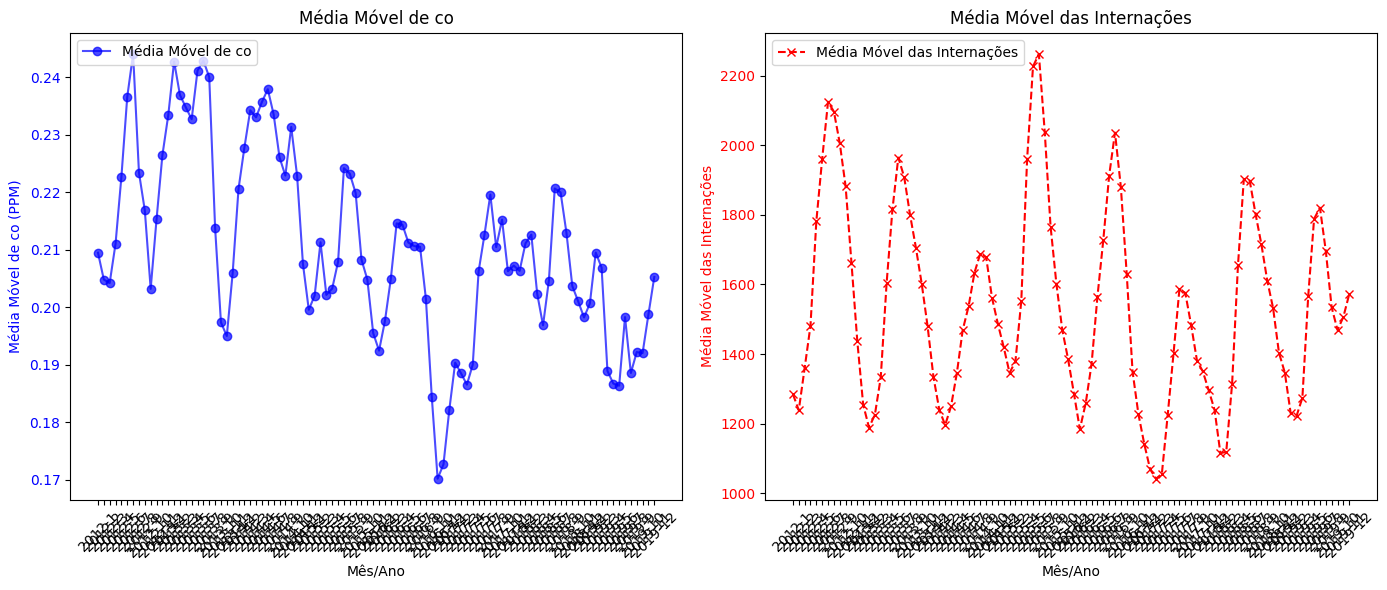

In [60]:
#@title Gráfico da média movel

# A média móvel é uma excelente ferramenta para analisar dados temporais e entender padrões de longo prazo sem ser afetado por flutuações mensais. Ao comparar as médias móveis
# do poluente e das internações, você pode identificar tendências e relações que podem ser relevantes para a análise de como a poluição impacta a saúde pública.

# Calcular a média móvel para suavizar as flutuações (opcional)
df_merged['co_moving_avg'] = df_merged[poluente].rolling(window=3, min_periods=1).mean()  # Média móvel de 3 meses
df_merged['internacoes_moving_avg'] = df_merged['num_internacoes'].rolling(window=3, min_periods=1).mean()  # Média móvel de 3 meses

# Criar uma figura com dois subgráficos lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))  # 1 linha, 2 colunas

# Gráfico 1: Média Móvel de CO
ax1.plot(df_merged['mes_ano'], df_merged['co_moving_avg'], label=f'Média Móvel de {poluente}', color='blue', linestyle='-', marker='o', alpha=0.7)
ax1.set_xlabel('Mês/Ano')
ax1.set_ylabel(f'Média Móvel de {poluente} (PPM)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.tick_params(axis='x', rotation=45)
ax1.set_title(f'Média Móvel de {poluente}', fontsize=12)
ax1.legend(loc='upper left')

# Gráfico 2: Média Móvel das Internações
ax2.plot(df_merged['mes_ano'], df_merged['internacoes_moving_avg'], label='Média Móvel das Internações', color='red', linestyle='--', marker='x')
ax2.set_xlabel('Mês/Ano')
ax2.set_ylabel('Média Móvel das Internações', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.tick_params(axis='x', rotation=45)
ax2.set_title('Média Móvel das Internações', fontsize=12)
ax2.legend(loc='upper left')

# Ajuste de layout para não sobrepor os elementos
plt.tight_layout()

# Mostrar os gráficos
plt.show()

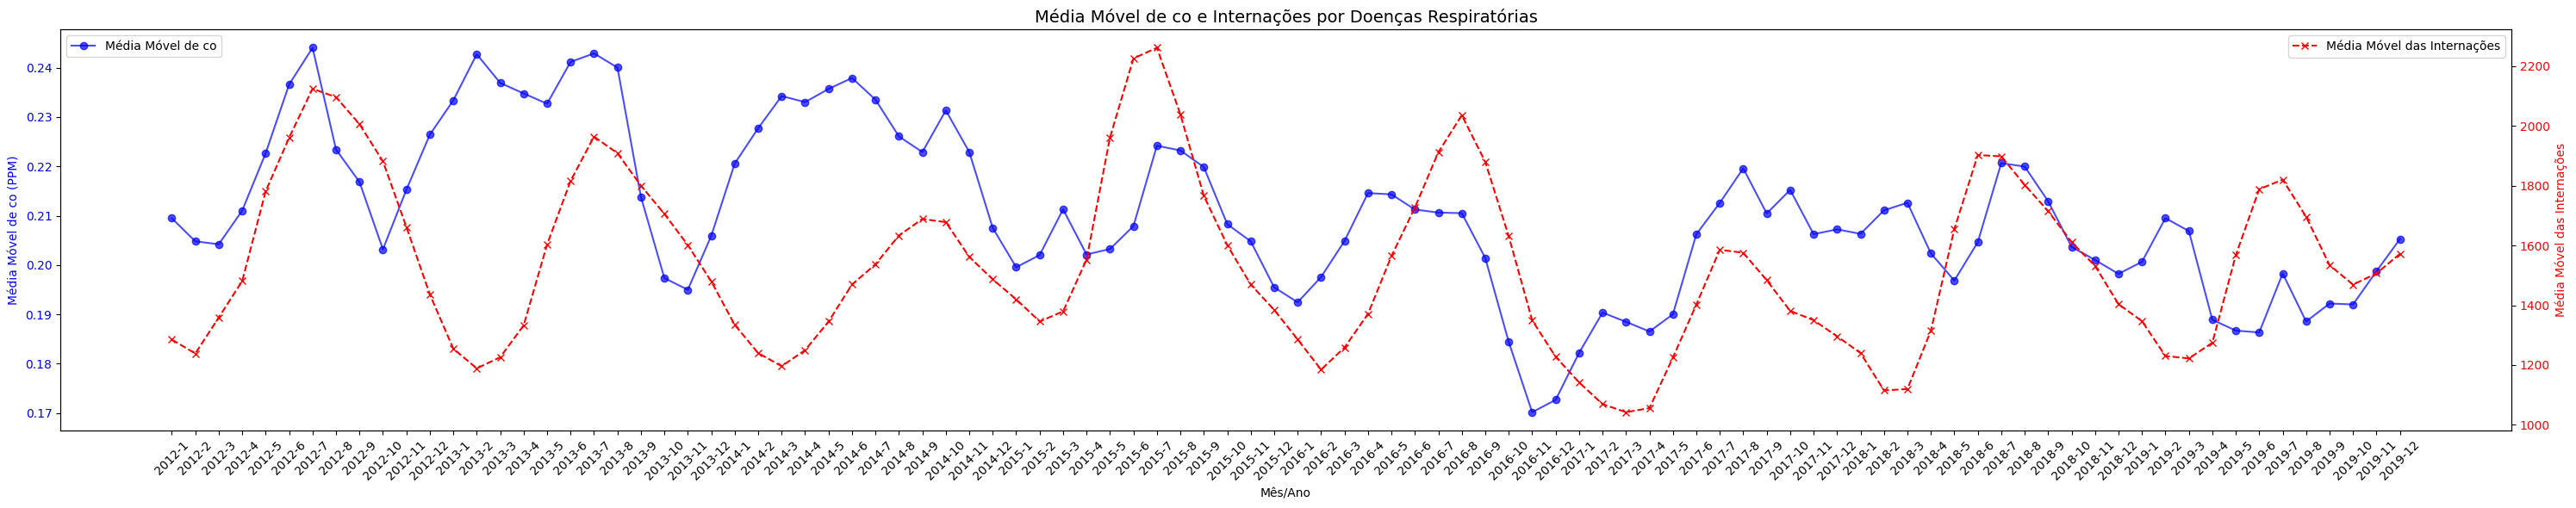

In [61]:
#@title Media movel sobreposto

# Calcular a média móvel para suavizar as flutuações (opcional)
df_merged['co_moving_avg'] = df_merged[poluente].rolling(window=3, min_periods=1).mean()  # Média móvel de 3 meses
df_merged['internacoes_moving_avg'] = df_merged['num_internacoes'].rolling(window=3, min_periods=1).mean()  # Média móvel de 3 meses

# Gráfico 2: Média Móvel do Poluente e das Internações
fig, ax1 = plt.subplots(figsize=(30, 6))

# Plotar a média móvel do poluente no eixo Y à esquerda
ax1.plot(df_merged['mes_ano'], df_merged['co_moving_avg'], label=f'Média Móvel de {poluente}', color='blue', linestyle='-', marker='o', alpha=0.7)
ax1.set_xlabel('Mês/Ano')
ax1.set_ylabel(f'Média Móvel de {poluente} (PPM)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.tick_params(axis='x', rotation=45)

# Criar o eixo Y à direita para a média móvel das internações
ax2 = ax1.twinx()  # Cria o eixo Y à direita
ax2.plot(df_merged['mes_ano'], df_merged['internacoes_moving_avg'], label='Média Móvel das Internações', color='red', linestyle='--', marker='x')
ax2.set_ylabel('Média Móvel das Internações', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adicionar título
plt.title(f'Média Móvel de {poluente} e Internações por Doenças Respiratórias', fontsize=14)

# Adicionar as legendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Ajuste de layout para não sobrepor os elementos
plt.tight_layout()

# Mostrar o gráfico da média móvel
plt.show()

## 5.2 NO

In [62]:
poluente = 'no'

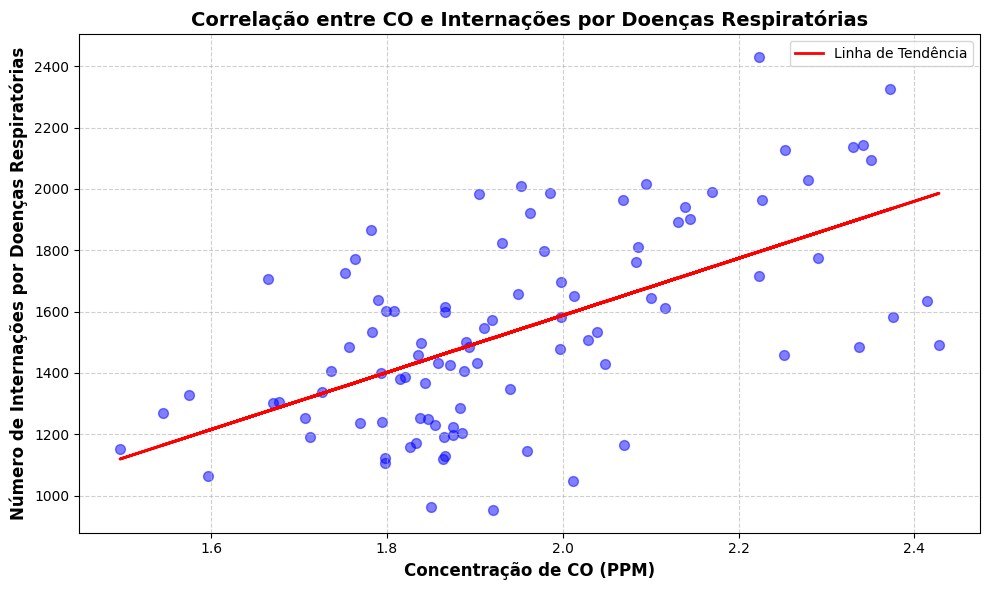

In [63]:
#@title ScatterPlot

# Ajustando a figura
plt.figure(figsize=(10, 6))

# Plotando o gráfico de dispersão
plt.scatter(df_merged[poluente], df_merged['num_internacoes'], c='blue', alpha=0.5, s=50)

# Ajustando a linha de tendência (regressão linear)
regressor = LinearRegression()
X = df_merged[poluente].values.reshape(-1, 1)  # Regressão no eixo x
y = df_merged['num_internacoes'].values
regressor.fit(X, y)
y_pred = regressor.predict(X)

# Plotando a linha de tendência
plt.plot(df_merged[poluente], y_pred, color='red', linewidth=2, label='Linha de Tendência')

# Adicionando rótulos e título
plt.xlabel('Concentração de CO (PPM)', fontsize=12, fontweight='bold')
plt.ylabel('Número de Internações por Doenças Respiratórias', fontsize=12, fontweight='bold')
plt.title('Correlação entre CO e Internações por Doenças Respiratórias', fontsize=14, fontweight='bold')

# Melhorando o grid
plt.grid(True, linestyle='--', alpha=0.6)

# Ajustando o layout para não cortar conteúdo
plt.tight_layout()

# Exibindo a legenda
plt.legend()

# Exibindo o gráfico
plt.show()

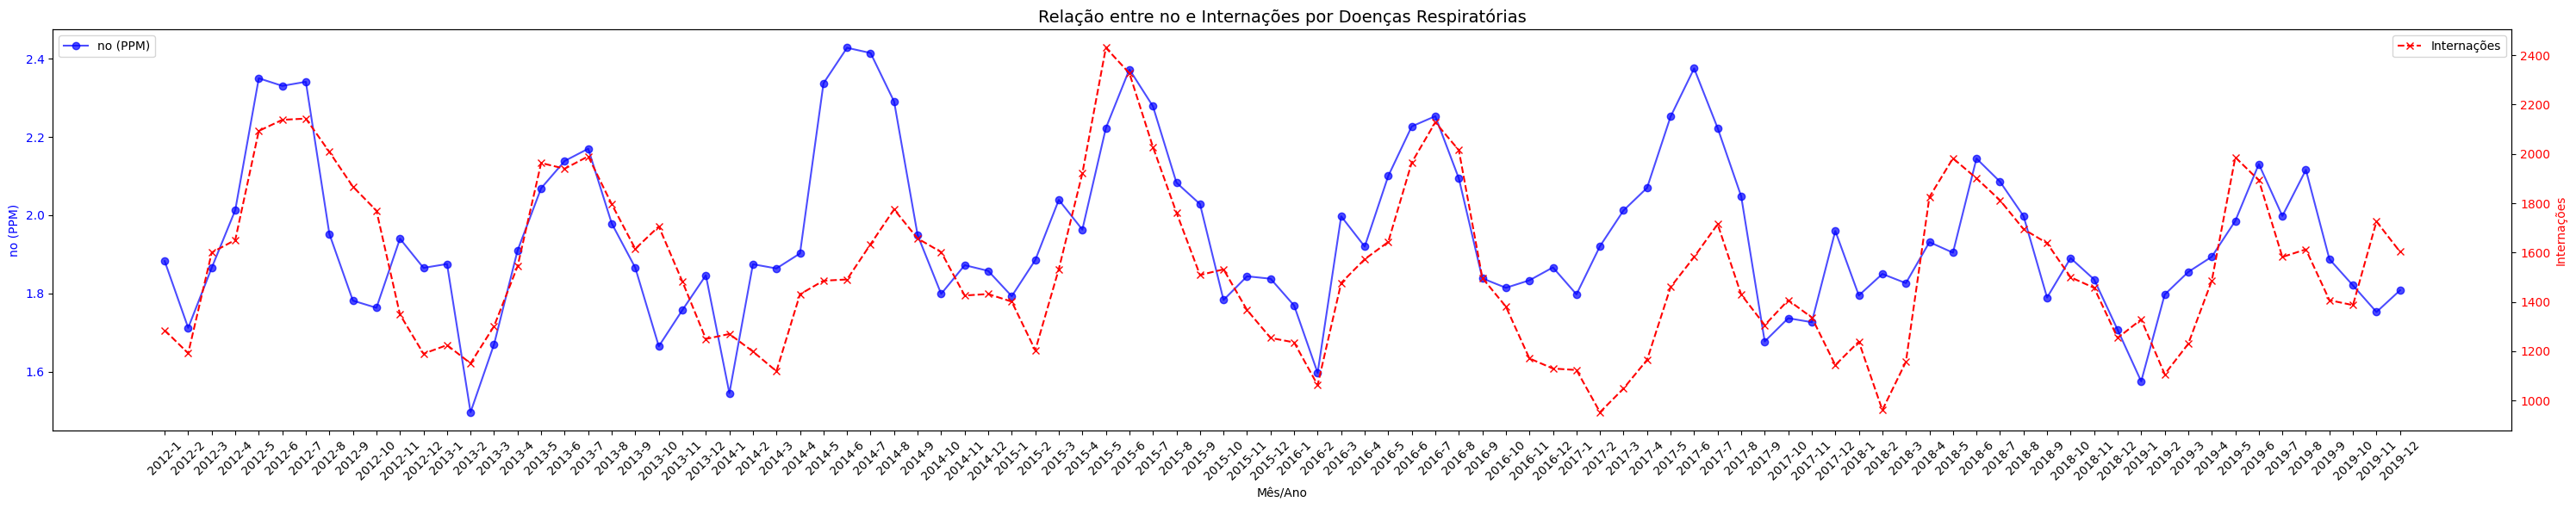

In [64]:
#@title Gerando gráfico de linha temporal para os valores de CO e numero de internados

# Gráfico 1: Relação entre Poluente e Internações
fig, ax1 = plt.subplots(figsize=(30, 6))

# Plotar o poluente no eixo Y à esquerda
ax1.plot(df_merged['mes_ano'], df_merged[poluente], label=f'{poluente} (PPM)', color='blue', marker='o', linestyle='-', alpha=0.7)
ax1.set_xlabel('Mês/Ano')
ax1.set_ylabel(f'{poluente} (PPM)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.tick_params(axis='x', rotation=45)  # Rotacionar as labels de mês/ano para melhor leitura

# Criar o eixo Y à direita para as internações
ax2 = ax1.twinx()  # Cria o eixo Y à direita
ax2.plot(df_merged['mes_ano'], df_merged['num_internacoes'], label='Internações', color='red', linestyle='--', marker='x')
ax2.set_ylabel('Internações', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adicionar título
plt.title(f'Relação entre {poluente} e Internações por Doenças Respiratórias', fontsize=14)

# Adicionar as legendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Ajuste de layout para não sobrepor os elementos
plt.tight_layout()

# Mostrar o gráfico de linha original
plt.show()

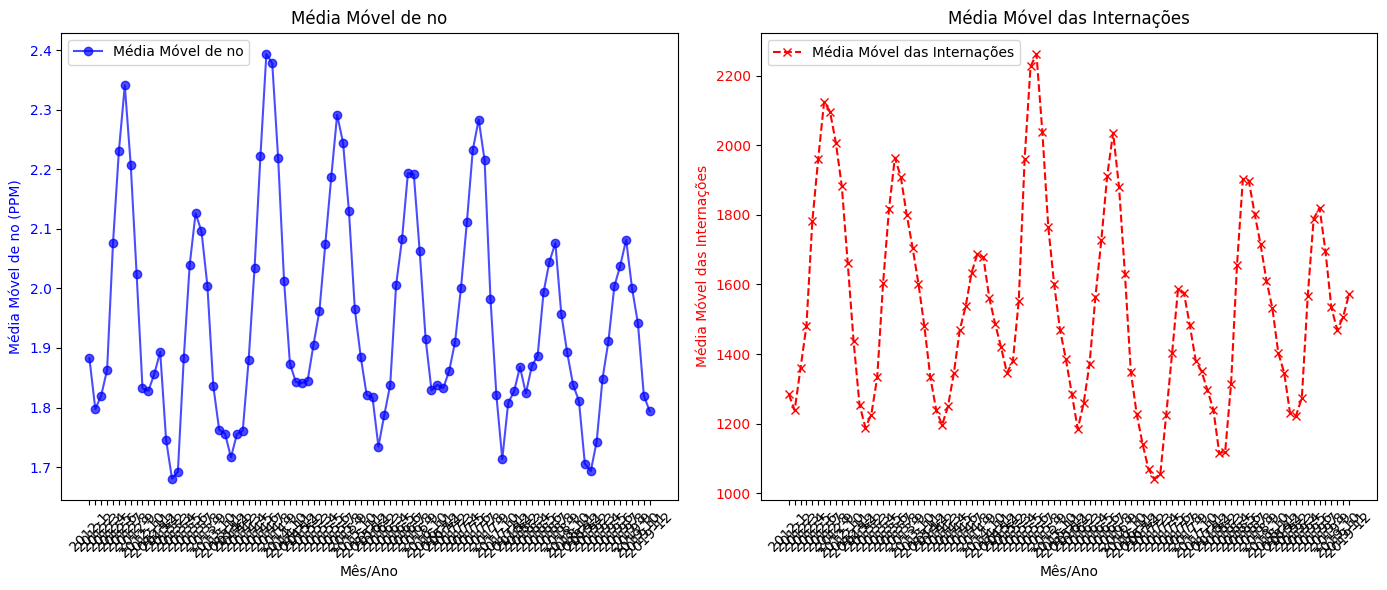

In [65]:
#@title Gráfico da média movel

# A média móvel é uma excelente ferramenta para analisar dados temporais e entender padrões de longo prazo sem ser afetado por flutuações mensais. Ao comparar as médias móveis
# do poluente e das internações, você pode identificar tendências e relações que podem ser relevantes para a análise de como a poluição impacta a saúde pública.

# Calcular a média móvel para suavizar as flutuações (opcional)
df_merged['co_moving_avg'] = df_merged[poluente].rolling(window=3, min_periods=1).mean()  # Média móvel de 3 meses
df_merged['internacoes_moving_avg'] = df_merged['num_internacoes'].rolling(window=3, min_periods=1).mean()  # Média móvel de 3 meses

# Criar uma figura com dois subgráficos lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))  # 1 linha, 2 colunas

# Gráfico 1: Média Móvel de CO
ax1.plot(df_merged['mes_ano'], df_merged['co_moving_avg'], label=f'Média Móvel de {poluente}', color='blue', linestyle='-', marker='o', alpha=0.7)
ax1.set_xlabel('Mês/Ano')
ax1.set_ylabel(f'Média Móvel de {poluente} (PPM)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.tick_params(axis='x', rotation=45)
ax1.set_title(f'Média Móvel de {poluente}', fontsize=12)
ax1.legend(loc='upper left')

# Gráfico 2: Média Móvel das Internações
ax2.plot(df_merged['mes_ano'], df_merged['internacoes_moving_avg'], label='Média Móvel das Internações', color='red', linestyle='--', marker='x')
ax2.set_xlabel('Mês/Ano')
ax2.set_ylabel('Média Móvel das Internações', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.tick_params(axis='x', rotation=45)
ax2.set_title('Média Móvel das Internações', fontsize=12)
ax2.legend(loc='upper left')

# Ajuste de layout para não sobrepor os elementos
plt.tight_layout()

# Mostrar os gráficos
plt.show()

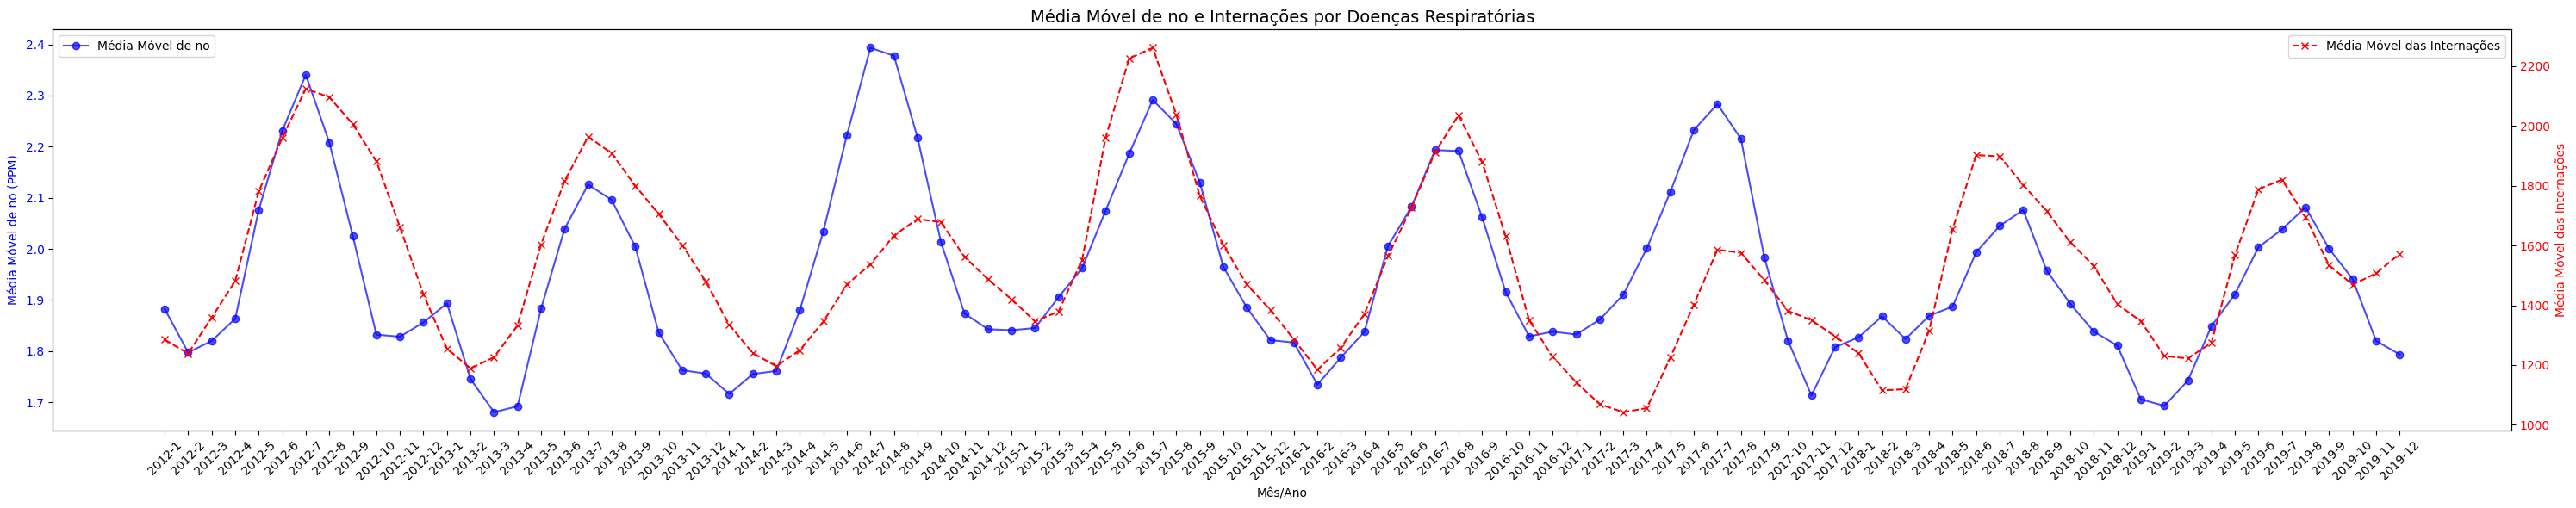

In [66]:
#@title Media movel sobreposto

# Calcular a média móvel para suavizar as flutuações (opcional)
df_merged['co_moving_avg'] = df_merged[poluente].rolling(window=3, min_periods=1).mean()  # Média móvel de 3 meses
df_merged['internacoes_moving_avg'] = df_merged['num_internacoes'].rolling(window=3, min_periods=1).mean()  # Média móvel de 3 meses

# Gráfico 2: Média Móvel do Poluente e das Internações
fig, ax1 = plt.subplots(figsize=(30, 6))

# Plotar a média móvel do poluente no eixo Y à esquerda
ax1.plot(df_merged['mes_ano'], df_merged['co_moving_avg'], label=f'Média Móvel de {poluente}', color='blue', linestyle='-', marker='o', alpha=0.7)
ax1.set_xlabel('Mês/Ano')
ax1.set_ylabel(f'Média Móvel de {poluente} (PPM)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.tick_params(axis='x', rotation=45)

# Criar o eixo Y à direita para a média móvel das internações
ax2 = ax1.twinx()  # Cria o eixo Y à direita
ax2.plot(df_merged['mes_ano'], df_merged['internacoes_moving_avg'], label='Média Móvel das Internações', color='red', linestyle='--', marker='x')
ax2.set_ylabel('Média Móvel das Internações', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adicionar título
plt.title(f'Média Móvel de {poluente} e Internações por Doenças Respiratórias', fontsize=14)

# Adicionar as legendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Ajuste de layout para não sobrepor os elementos
plt.tight_layout()

# Mostrar o gráfico da média móvel
plt.show()

## 5.2 NO2

In [ ]:
poluente = 'no2'

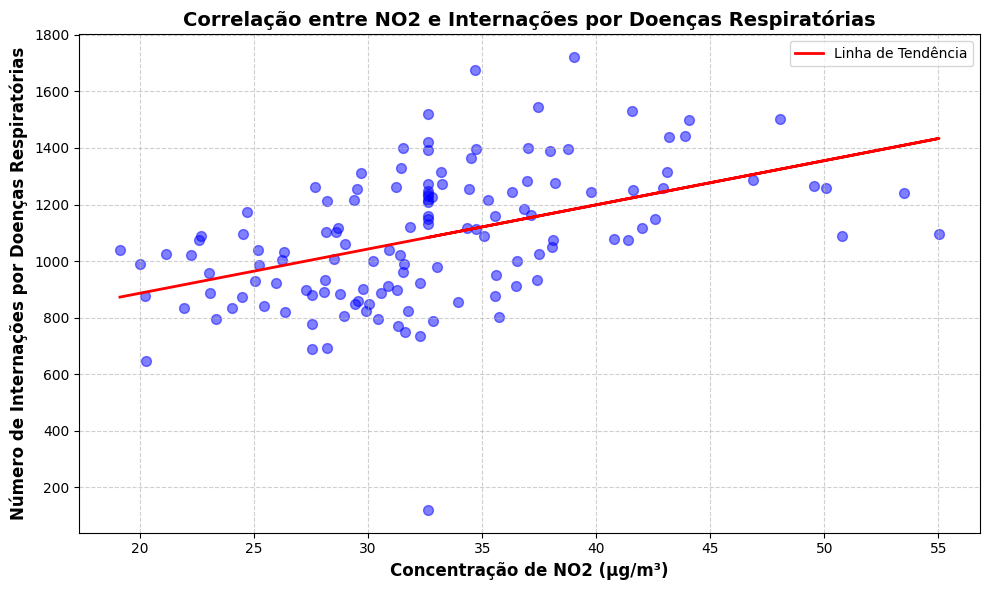

In [ ]:
#@title ScatterPlot

# Ajustando a figura
plt.figure(figsize=(10, 6))

# Plotando o gráfico de dispersão
plt.scatter(df_merged[poluente], df_merged['num_internacoes'], c='blue', alpha=0.5, s=50)

# Ajustando a linha de tendência (regressão linear)
regressor = LinearRegression()
X = df_merged[poluente].values.reshape(-1, 1)  # Regressão no eixo x
y = df_merged['num_internacoes'].values
regressor.fit(X, y)
y_pred = regressor.predict(X)

# Plotando a linha de tendência
plt.plot(df_merged[poluente], y_pred, color='red', linewidth=2, label='Linha de Tendência')

# Adicionando rótulos e título
plt.xlabel('Concentração de NO2 (µg/m³)', fontsize=12, fontweight='bold')
plt.ylabel('Número de Internações por Doenças Respiratórias', fontsize=12, fontweight='bold')
plt.title('Correlação entre NO2 e Internações por Doenças Respiratórias', fontsize=14, fontweight='bold')

# Melhorando o grid
plt.grid(True, linestyle='--', alpha=0.6)

# Ajustando o layout para não cortar conteúdo
plt.tight_layout()

# Exibindo a legenda
plt.legend()

# Exibindo o gráfico
plt.show()

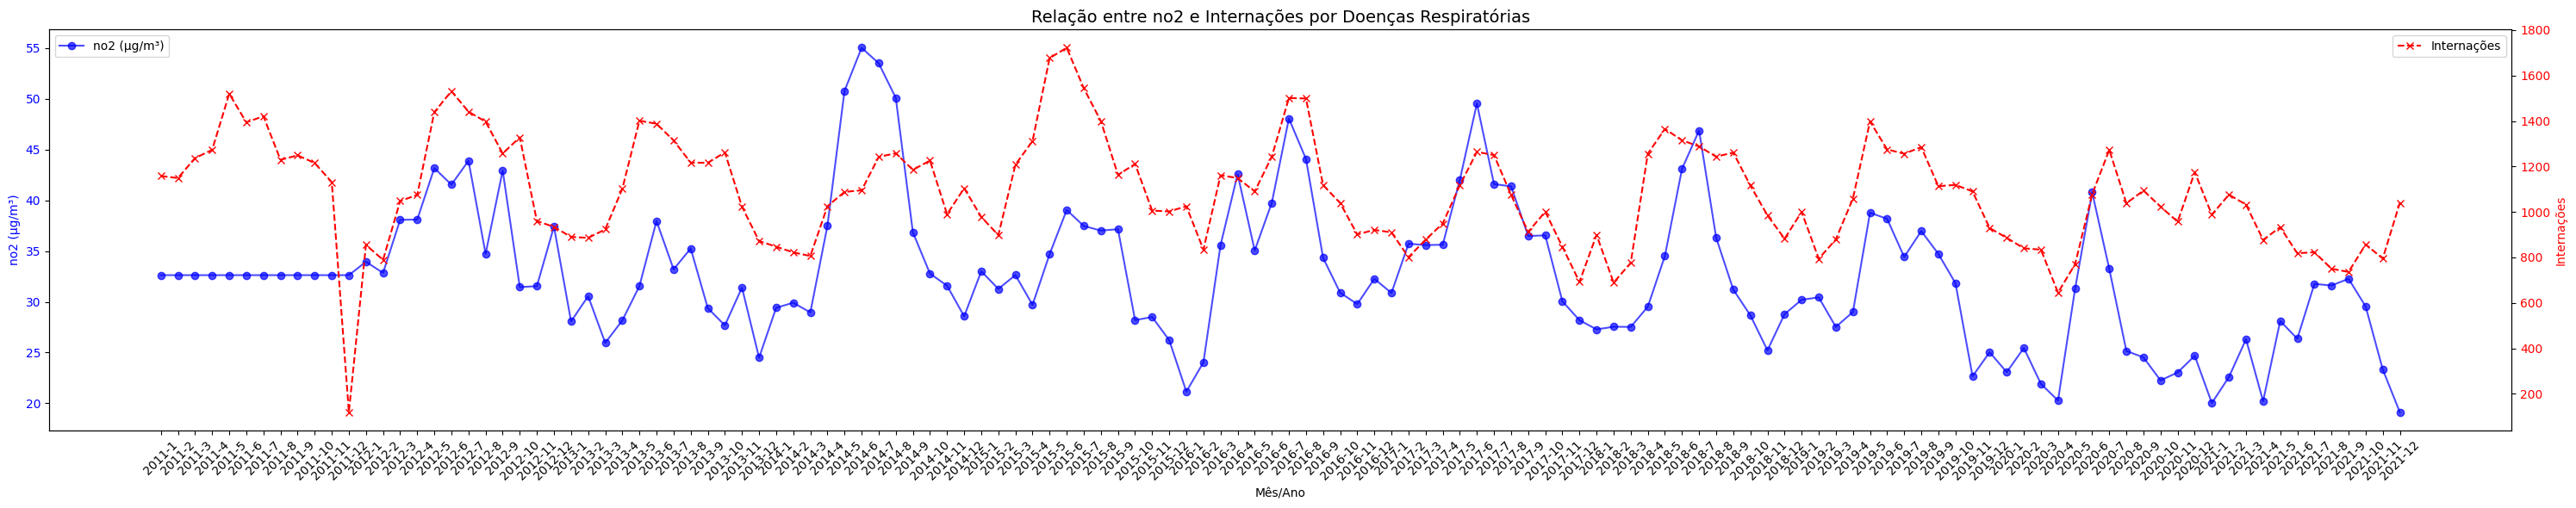

In [ ]:
#@title Gerando gráfico de linha temporal para os valores de NO2 e numero de internados

# Gráfico 1: Relação entre Poluente e Internações
fig, ax1 = plt.subplots(figsize=(30, 6))

# Plotar o poluente no eixo Y à esquerda
ax1.plot(df_merged['mes_ano'], df_merged[poluente], label=f'{poluente} (µg/m³)', color='blue', marker='o', linestyle='-', alpha=0.7)
ax1.set_xlabel('Mês/Ano')
ax1.set_ylabel(f'{poluente} (µg/m³)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.tick_params(axis='x', rotation=45)  # Rotacionar as labels de mês/ano para melhor leitura

# Criar o eixo Y à direita para as internações
ax2 = ax1.twinx()  # Cria o eixo Y à direita
ax2.plot(df_merged['mes_ano'], df_merged['num_internacoes'], label='Internações', color='red', linestyle='--', marker='x')
ax2.set_ylabel('Internações', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adicionar título
plt.title(f'Relação entre {poluente} e Internações por Doenças Respiratórias', fontsize=14)

# Adicionar as legendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Ajuste de layout para não sobrepor os elementos
plt.tight_layout()

# Mostrar o gráfico de linha original
plt.show()

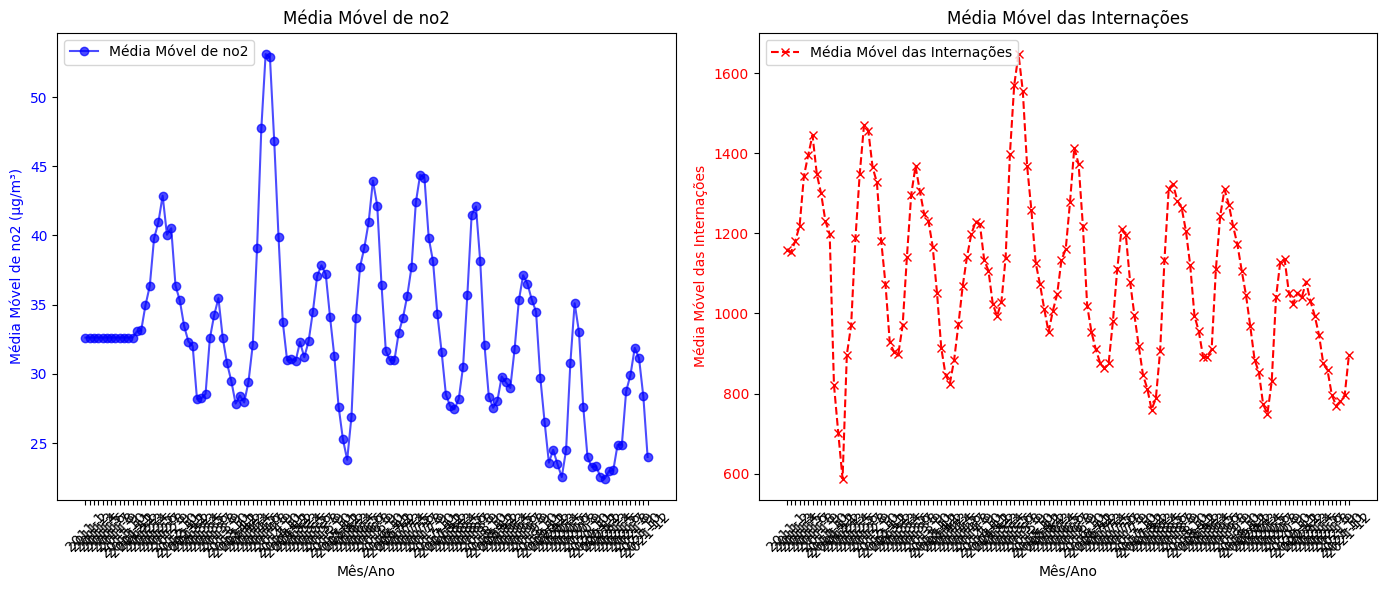

In [ ]:
#@title Gráfico da média movel

# A média móvel é uma excelente ferramenta para analisar dados temporais e entender padrões de longo prazo sem ser afetado por flutuações mensais. Ao comparar as médias móveis
# do poluente e das internações, você pode identificar tendências e relações que podem ser relevantes para a análise de como a poluição impacta a saúde pública.

# Calcular a média móvel para suavizar as flutuações (opcional)
df_merged['no2_moving_avg'] = df_merged[poluente].rolling(window=3, min_periods=1).mean()  # Média móvel de 3 meses
df_merged['internacoes_moving_avg'] = df_merged['num_internacoes'].rolling(window=3, min_periods=1).mean()  # Média móvel de 3 meses

# Criar uma figura com dois subgráficos lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))  # 1 linha, 2 colunas

# Gráfico 1: Média Móvel de NO2
ax1.plot(df_merged['mes_ano'], df_merged['no2_moving_avg'], label=f'Média Móvel de {poluente}', color='blue', linestyle='-', marker='o', alpha=0.7)
ax1.set_xlabel('Mês/Ano')
ax1.set_ylabel(f'Média Móvel de {poluente} (µg/m³)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.tick_params(axis='x', rotation=45)
ax1.set_title(f'Média Móvel de {poluente}', fontsize=12)
ax1.legend(loc='upper left')

# Gráfico 2: Média Móvel das Internações
ax2.plot(df_merged['mes_ano'], df_merged['internacoes_moving_avg'], label='Média Móvel das Internações', color='red', linestyle='--', marker='x')
ax2.set_xlabel('Mês/Ano')
ax2.set_ylabel('Média Móvel das Internações', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.tick_params(axis='x', rotation=45)
ax2.set_title('Média Móvel das Internações', fontsize=12)
ax2.legend(loc='upper left')

# Ajuste de layout para não sobrepor os elementos
plt.tight_layout()

# Mostrar os gráficos
plt.show()

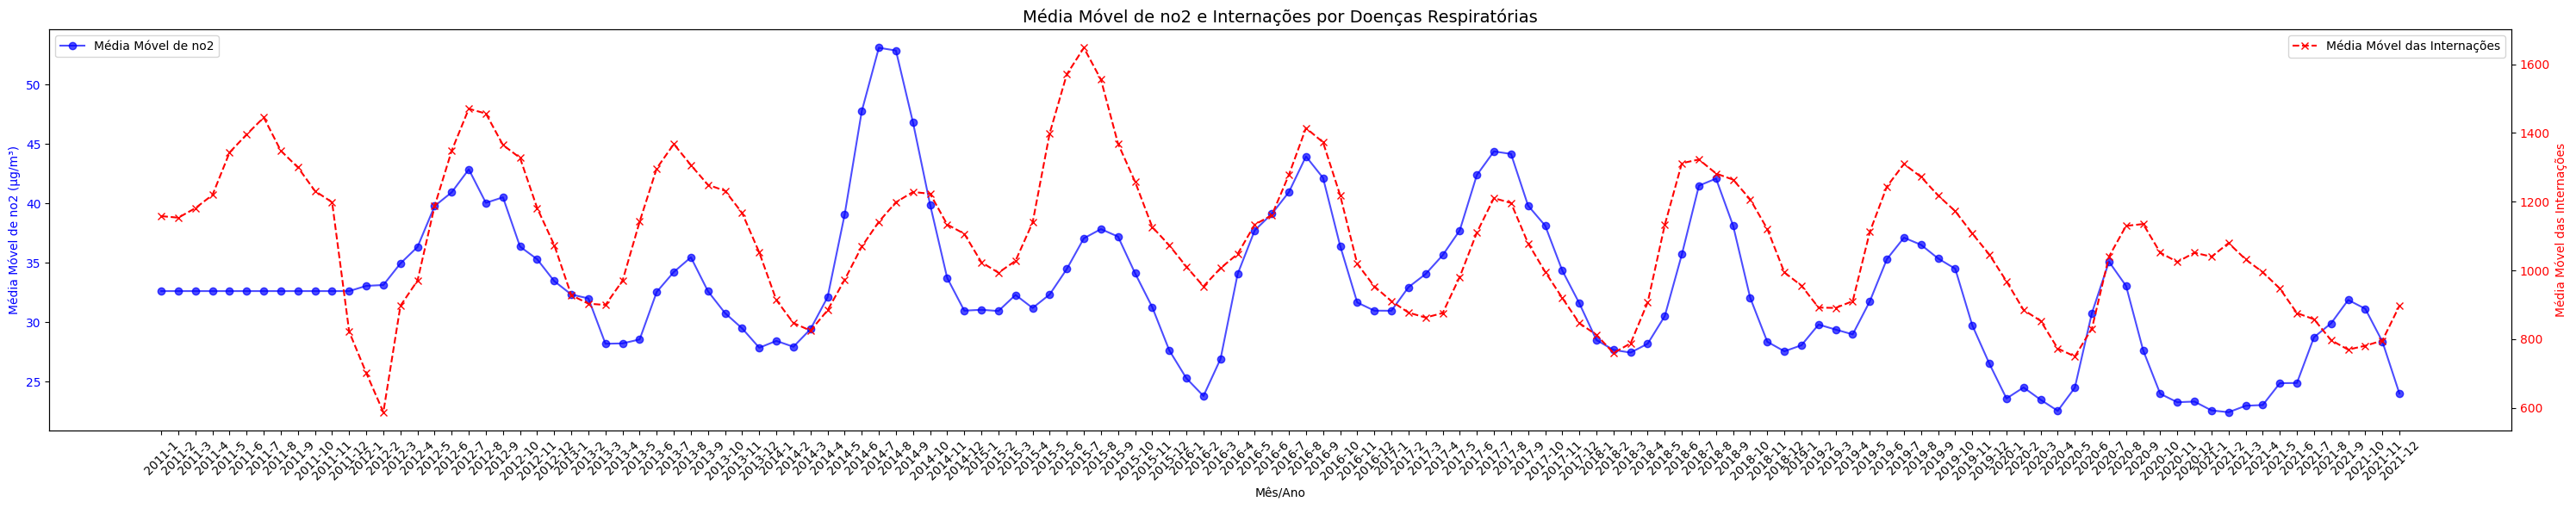

In [ ]:
#@title Media movel sobreposto

# Calcular a média móvel para suavizar as flutuações (opcional)
df_merged['pm2_5_moving_avg'] = df_merged[poluente].rolling(window=3, min_periods=1).mean()  # Média móvel de 3 meses
df_merged['internacoes_moving_avg'] = df_merged['num_internacoes'].rolling(window=3, min_periods=1).mean()  # Média móvel de 3 meses

# Gráfico 2: Média Móvel do Poluente e das Internações
fig, ax1 = plt.subplots(figsize=(30, 6))

# Plotar a média móvel do poluente no eixo Y à esquerda
ax1.plot(df_merged['mes_ano'], df_merged['pm2_5_moving_avg'], label=f'Média Móvel de {poluente}', color='blue', linestyle='-', marker='o', alpha=0.7)
ax1.set_xlabel('Mês/Ano')
ax1.set_ylabel(f'Média Móvel de {poluente} (µg/m³)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.tick_params(axis='x', rotation=45)

# Criar o eixo Y à direita para a média móvel das internações
ax2 = ax1.twinx()  # Cria o eixo Y à direita
ax2.plot(df_merged['mes_ano'], df_merged['internacoes_moving_avg'], label='Média Móvel das Internações', color='red', linestyle='--', marker='x')
ax2.set_ylabel('Média Móvel das Internações', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adicionar título
plt.title(f'Média Móvel de {poluente} e Internações por Doenças Respiratórias', fontsize=14)

# Adicionar as legendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Ajuste de layout para não sobrepor os elementos
plt.tight_layout()

# Mostrar o gráfico da média móvel
plt.show()

## 5.2 NOX

In [107]:
poluente = 'nox'

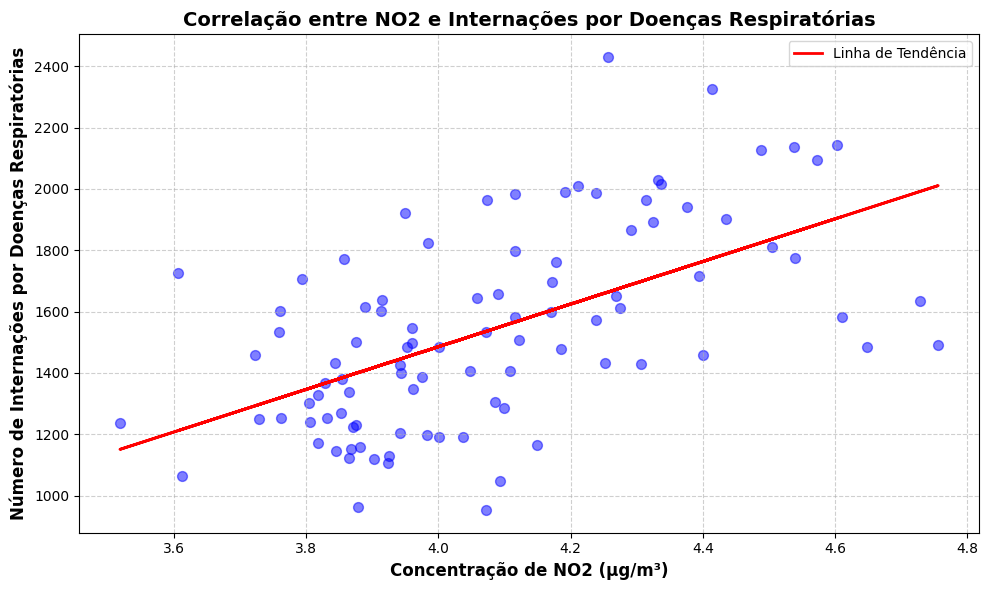

In [108]:
#@title ScatterPlot

# Ajustando a figura
plt.figure(figsize=(10, 6))

# Plotando o gráfico de dispersão
plt.scatter(df_merged[poluente], df_merged['num_internacoes'], c='blue', alpha=0.5, s=50)

# Ajustando a linha de tendência (regressão linear)
regressor = LinearRegression()
X = df_merged[poluente].values.reshape(-1, 1)  # Regressão no eixo x
y = df_merged['num_internacoes'].values
regressor.fit(X, y)
y_pred = regressor.predict(X)

# Plotando a linha de tendência
plt.plot(df_merged[poluente], y_pred, color='red', linewidth=2, label='Linha de Tendência')

# Adicionando rótulos e título
plt.xlabel('Concentração de NO2 (µg/m³)', fontsize=12, fontweight='bold')
plt.ylabel('Número de Internações por Doenças Respiratórias', fontsize=12, fontweight='bold')
plt.title('Correlação entre NO2 e Internações por Doenças Respiratórias', fontsize=14, fontweight='bold')

# Melhorando o grid
plt.grid(True, linestyle='--', alpha=0.6)

# Ajustando o layout para não cortar conteúdo
plt.tight_layout()

# Exibindo a legenda
plt.legend()

# Exibindo o gráfico
plt.show()

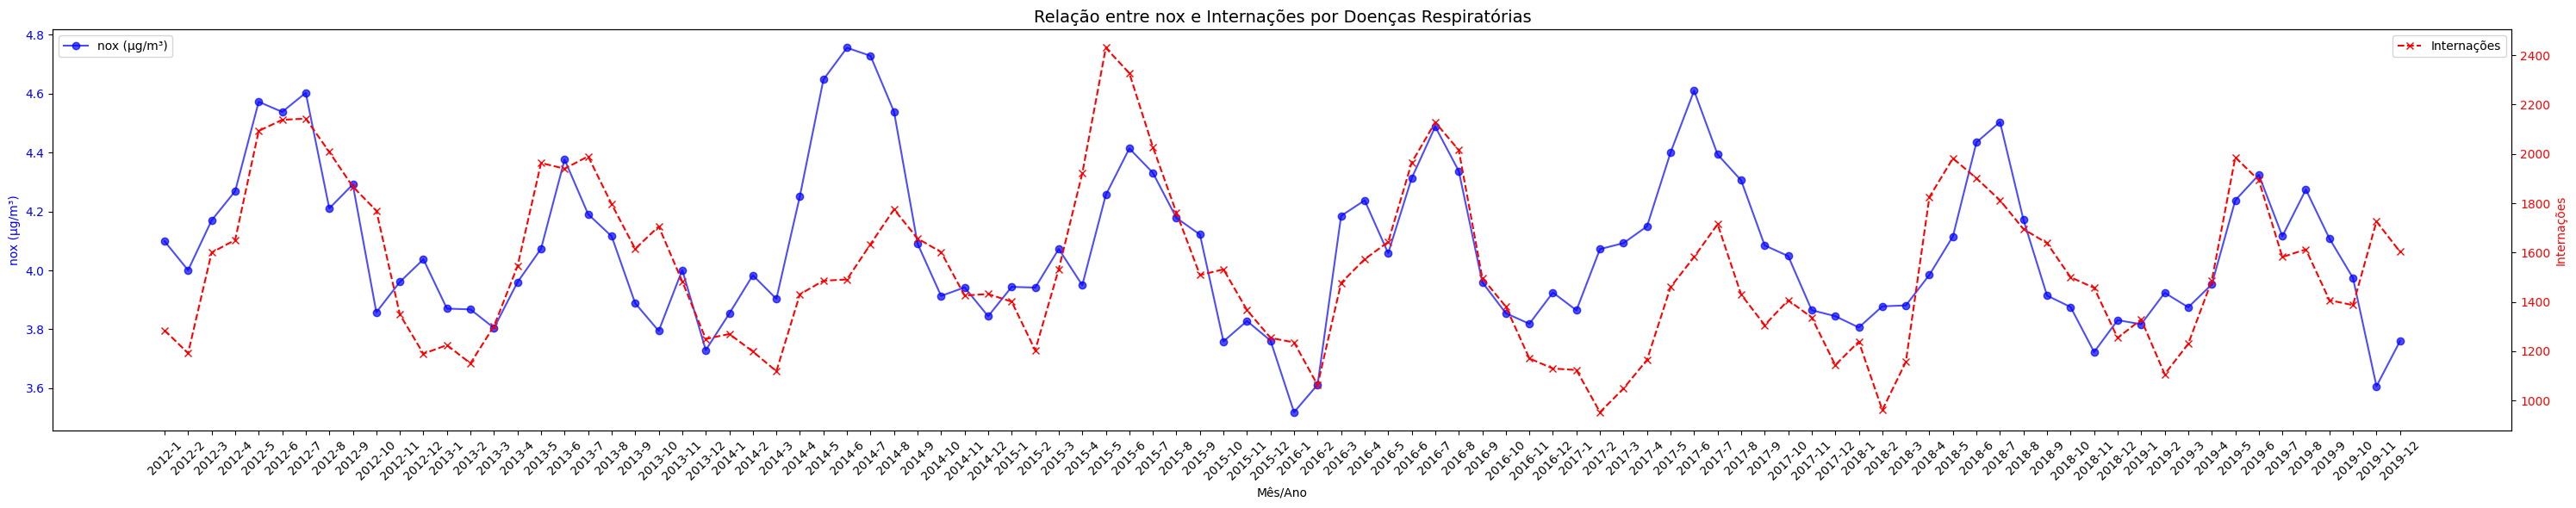

In [89]:
#@title Gerando gráfico de linha temporal para os valores de NO2 e numero de internados

# Gráfico 1: Relação entre Poluente e Internações
fig, ax1 = plt.subplots(figsize=(30, 6))

# Plotar o poluente no eixo Y à esquerda
ax1.plot(df_merged['mes_ano'], df_merged[poluente], label=f'{poluente} (µg/m³)', color='blue', marker='o', linestyle='-', alpha=0.7)
ax1.set_xlabel('Mês/Ano')
ax1.set_ylabel(f'{poluente} (µg/m³)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.tick_params(axis='x', rotation=45)  # Rotacionar as labels de mês/ano para melhor leitura

# Criar o eixo Y à direita para as internações
ax2 = ax1.twinx()  # Cria o eixo Y à direita
ax2.plot(df_merged['mes_ano'], df_merged['num_internacoes'], label='Internações', color='red', linestyle='--', marker='x')
ax2.set_ylabel('Internações', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adicionar título
plt.title(f'Relação entre {poluente} e Internações por Doenças Respiratórias', fontsize=14)

# Adicionar as legendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Ajuste de layout para não sobrepor os elementos
plt.tight_layout()

# Mostrar o gráfico de linha original
plt.show()

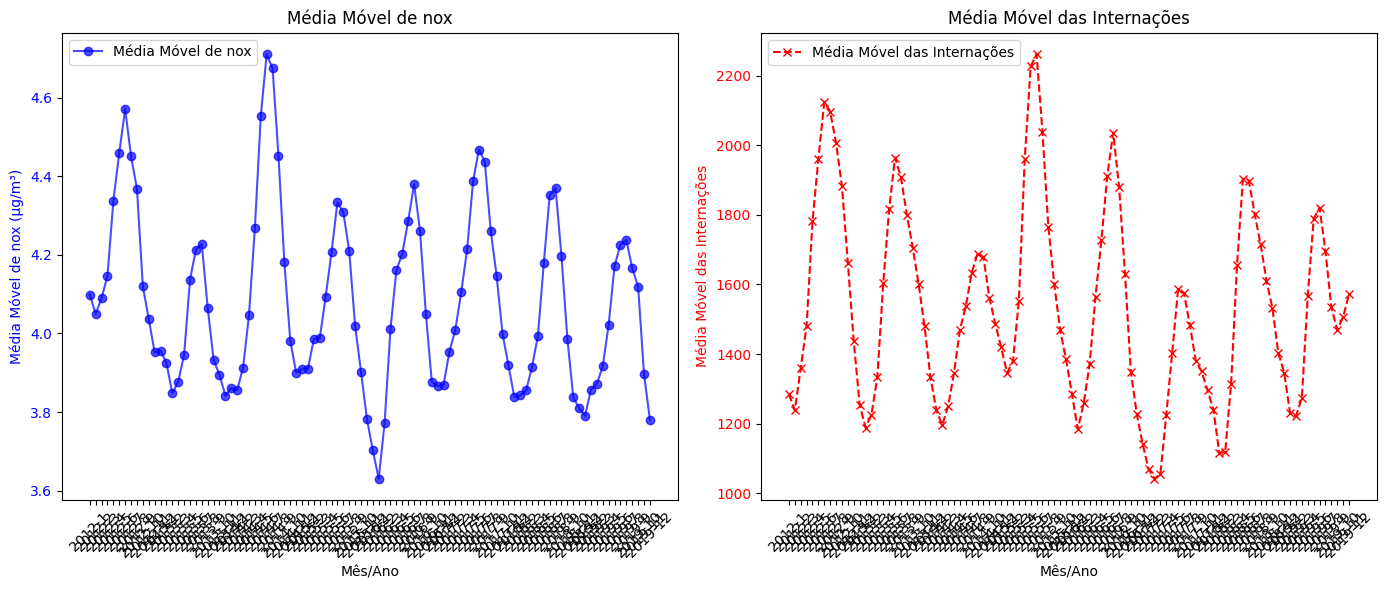

In [55]:
#@title Gráfico da média movel

# A média móvel é uma excelente ferramenta para analisar dados temporais e entender padrões de longo prazo sem ser afetado por flutuações mensais. Ao comparar as médias móveis
# do poluente e das internações, você pode identificar tendências e relações que podem ser relevantes para a análise de como a poluição impacta a saúde pública.

# Calcular a média móvel para suavizar as flutuações (opcional)
df_merged['no2_moving_avg'] = df_merged[poluente].rolling(window=3, min_periods=1).mean()  # Média móvel de 3 meses
df_merged['internacoes_moving_avg'] = df_merged['num_internacoes'].rolling(window=3, min_periods=1).mean()  # Média móvel de 3 meses

# Criar uma figura com dois subgráficos lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))  # 1 linha, 2 colunas

# Gráfico 1: Média Móvel de NO2
ax1.plot(df_merged['mes_ano'], df_merged['no2_moving_avg'], label=f'Média Móvel de {poluente}', color='blue', linestyle='-', marker='o', alpha=0.7)
ax1.set_xlabel('Mês/Ano')
ax1.set_ylabel(f'Média Móvel de {poluente} (µg/m³)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.tick_params(axis='x', rotation=45)
ax1.set_title(f'Média Móvel de {poluente}', fontsize=12)
ax1.legend(loc='upper left')

# Gráfico 2: Média Móvel das Internações
ax2.plot(df_merged['mes_ano'], df_merged['internacoes_moving_avg'], label='Média Móvel das Internações', color='red', linestyle='--', marker='x')
ax2.set_xlabel('Mês/Ano')
ax2.set_ylabel('Média Móvel das Internações', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.tick_params(axis='x', rotation=45)
ax2.set_title('Média Móvel das Internações', fontsize=12)
ax2.legend(loc='upper left')

# Ajuste de layout para não sobrepor os elementos
plt.tight_layout()

# Mostrar os gráficos
plt.show()

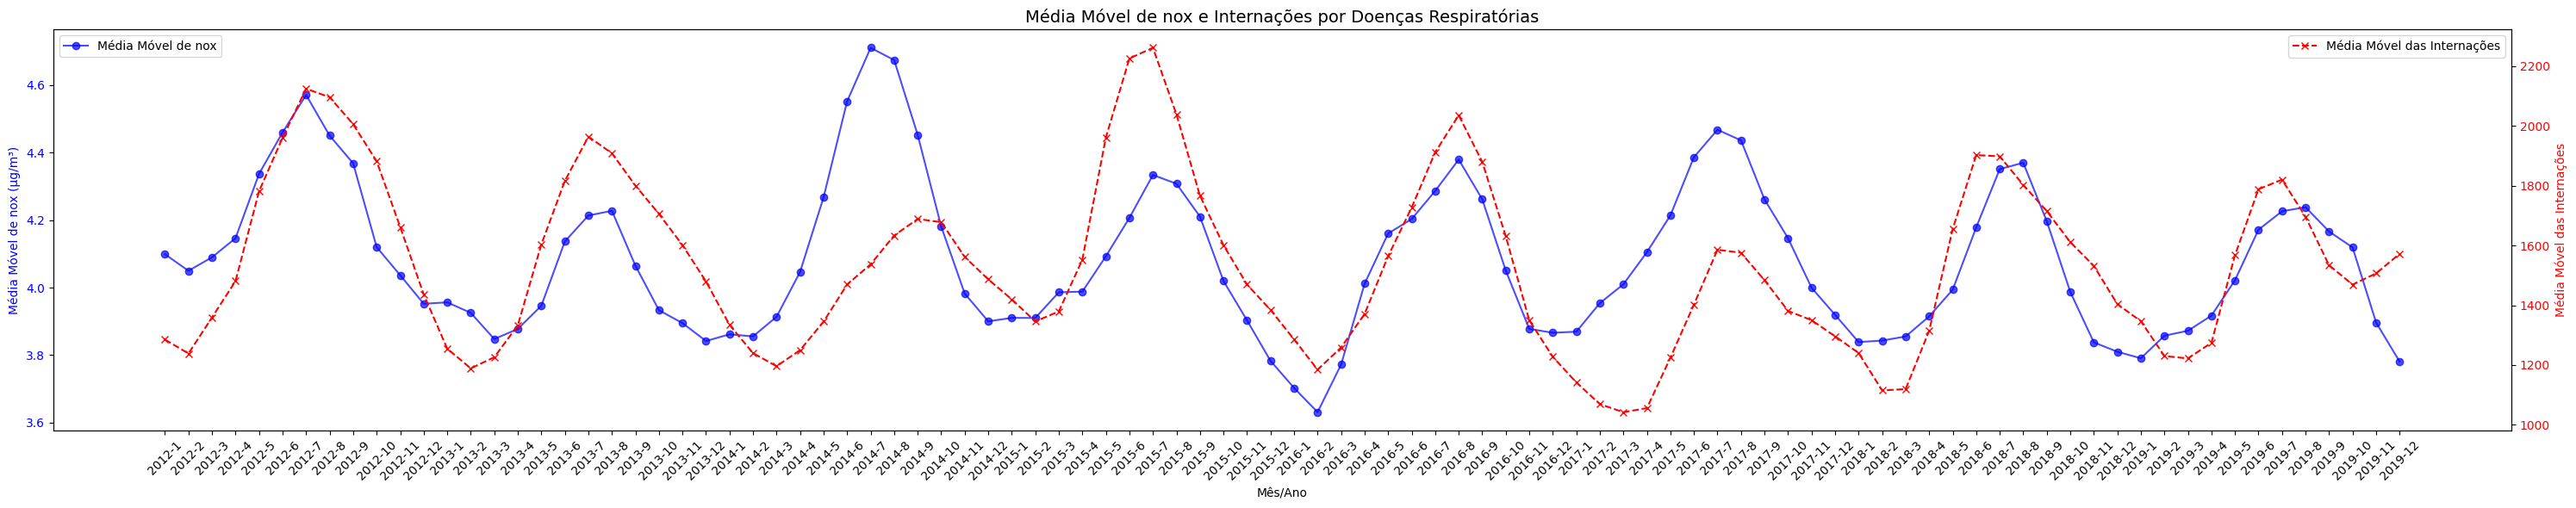

In [56]:
#@title Media movel sobreposto

# Calcular a média móvel para suavizar as flutuações (opcional)
df_merged['pm2_5_moving_avg'] = df_merged[poluente].rolling(window=3, min_periods=1).mean()  # Média móvel de 3 meses
df_merged['internacoes_moving_avg'] = df_merged['num_internacoes'].rolling(window=3, min_periods=1).mean()  # Média móvel de 3 meses

# Gráfico 2: Média Móvel do Poluente e das Internações
fig, ax1 = plt.subplots(figsize=(30, 6))

# Plotar a média móvel do poluente no eixo Y à esquerda
ax1.plot(df_merged['mes_ano'], df_merged['pm2_5_moving_avg'], label=f'Média Móvel de {poluente}', color='blue', linestyle='-', marker='o', alpha=0.7)
ax1.set_xlabel('Mês/Ano')
ax1.set_ylabel(f'Média Móvel de {poluente} (µg/m³)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.tick_params(axis='x', rotation=45)

# Criar o eixo Y à direita para a média móvel das internações
ax2 = ax1.twinx()  # Cria o eixo Y à direita
ax2.plot(df_merged['mes_ano'], df_merged['internacoes_moving_avg'], label='Média Móvel das Internações', color='red', linestyle='--', marker='x')
ax2.set_ylabel('Média Móvel das Internações', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adicionar título
plt.title(f'Média Móvel de {poluente} e Internações por Doenças Respiratórias', fontsize=14)

# Adicionar as legendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Ajuste de layout para não sobrepor os elementos
plt.tight_layout()

# Mostrar o gráfico da média móvel
plt.show()

# 6. Aplicando StandardScalar para deixar poluentes na mesma escala

In [103]:
poluentes = ['pm2_5_scaled', 'nox_scaled', 'pm10_scaled']

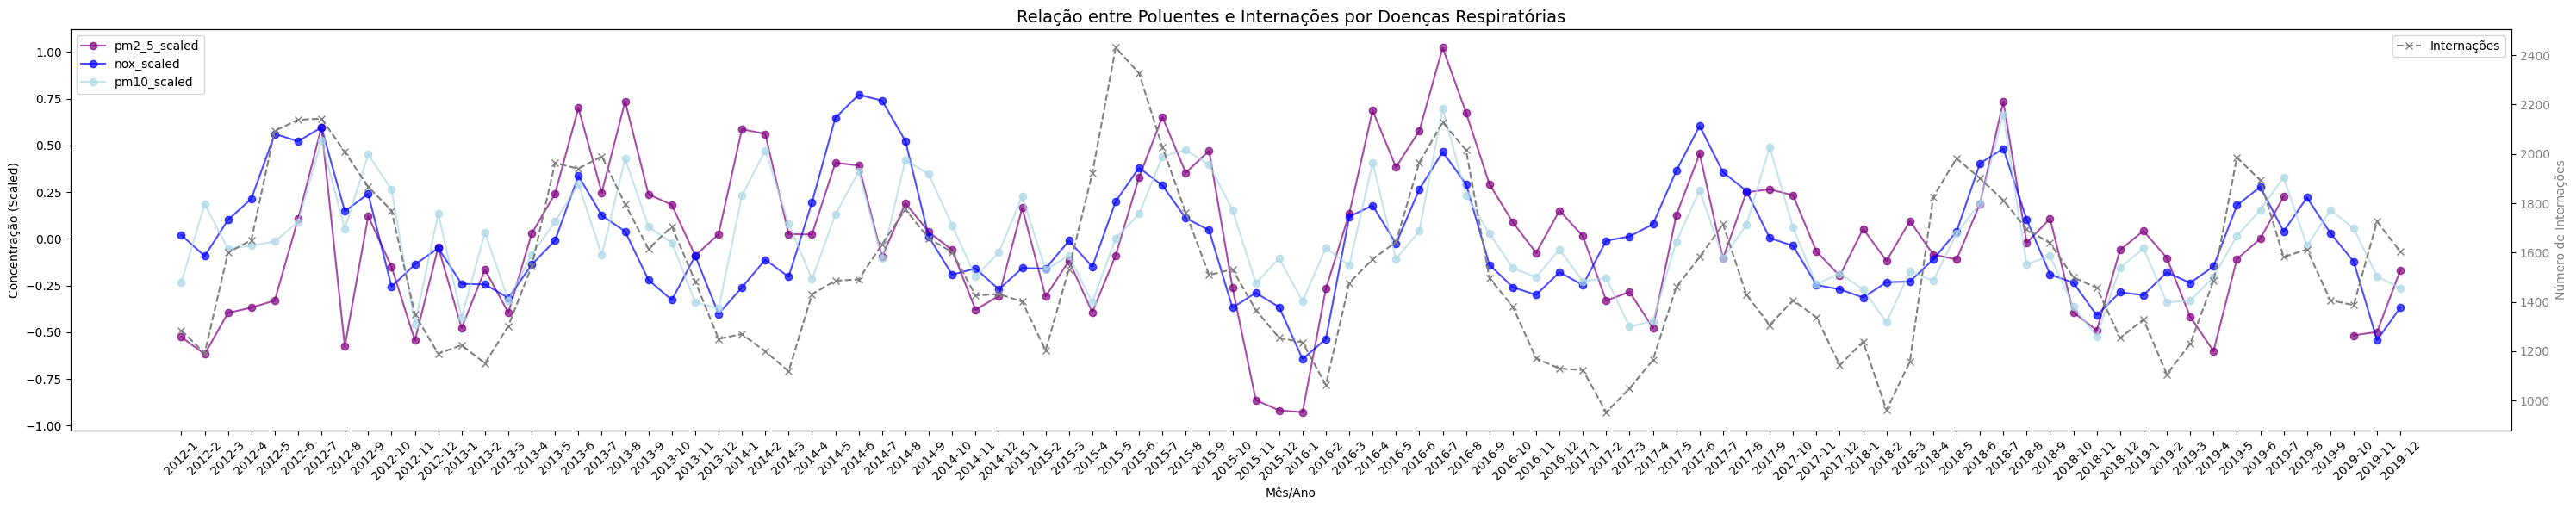

In [106]:
#@title Gerando gráfico de linha temporal para os valores de NO2 e numero de internados

# Lista de poluentes e cores correspondentes
cores = ['#800080', '#0000FF', '#ADD8E6']  # Cores distintas para cada poluente

# Configuração do gráfico
fig, ax1 = plt.subplots(figsize=(30, 6))

# Plotar cada poluente com sua cor no eixo Y à esquerda
for poluente, cor in zip(poluentes, cores):
    ax1.plot(df_merged['mes_ano'], df_merged[poluente], label=poluente, color=cor, marker='o', linestyle='-', alpha=0.7)

ax1.set_xlabel('Mês/Ano')
ax1.set_ylabel('Concentração (Scaled)', color='black')  # Label único para todos os poluentes
ax1.tick_params(axis='y', labelcolor='black')
ax1.tick_params(axis='x', rotation=45)

# Eixo Y à direita para internações (mesmo código anterior)
ax2 = ax1.twinx()
ax2.plot(df_merged['mes_ano'], df_merged['num_internacoes'], label='Internações', color='gray', linestyle='--', marker='x')
ax2.set_ylabel('Número de Internações', color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

# Título e legendas
plt.title('Relação entre Poluentes e Internações por Doenças Respiratórias', fontsize=14)
ax1.legend(loc='upper left')  # Legenda dos poluentes
ax2.legend(loc='upper right') # Legenda das internações

plt.tight_layout()
plt.show()